In [1]:
# Data Loader
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
from pytorch_lightning.utilities.types import EVAL_DATALOADERS, TRAIN_DATALOADERS
import pytorch_lightning as pl
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm import tqdm
from torch.utils.data import random_split
import json
from CustomDataset import * 
import sys
sys.path.append('../')
from config import *
from file_helper import *

def collate_fn(batch):
    return tuple(zip(*batch))
#=================================
#             Augmentation
#=================================

def gauss_noise_tensor(img):
    rand = torch.rand(1)[0]
    if rand < 0.5 and Horizon_AUG:
        sigma = rand *0.125
        out = img + sigma * torch.randn_like(img)
        return out
    return img

def blank(img):    
    return img

class CustomDataModule(pl.LightningDataModule):
    def __init__(self , train_dir , test_dir , batch_size = 2, num_workers = 0 , img_size=[IMG_WIDTH, IMG_HEIGHT] , use_aug = True ,padding_count = 24 ,c =0.1 ):
        super().__init__()
        self.train_dir = train_dir
        self.test_dir = test_dir
        
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.img_size = img_size      
        self.use_aug = use_aug
        self.padding_count  = padding_count
        self.c = c
        
        pass

    def prepare_data(self) -> None:
        # Download dataset
        pass

    def setup(self, stage):
        # Create dataset...          
                
        self.entire_dataset = CustomDataset(self.train_dir  , use_aug= self.use_aug , padding_count= self.padding_count , c=self.c)
        self.train_ds , self.val_ds = random_split(self.entire_dataset , [0.9, 0.1])        
        self.test_ds = CustomDataset(self.test_dir  , use_aug= False)
        
        pass

    # ToDo: Reture Dataloader...
    def train_dataloader(self) -> TRAIN_DATALOADERS:
        return DataLoader(self.train_ds , batch_size= self.batch_size , num_workers= self.num_workers , shuffle=True)
    
    def val_dataloader(self) -> EVAL_DATALOADERS:
        return DataLoader(self.val_ds , batch_size= self.batch_size , num_workers= self.num_workers , shuffle=False)
    
    def test_dataloader(self) -> EVAL_DATALOADERS:
        return DataLoader(self.test_ds , batch_size= self.batch_size , num_workers= self.num_workers , shuffle=False)

    pass


# Test
dm = CustomDataModule ( train_dir= f"../anno/test_visiable_10_no_cross.json" ,
                       test_dir= f"../anno/test_visiable_10_no_cross.json" , padding_count=256
                       )

d:\conda\envs\layout\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


d:\Projects\Layout\NTHU_CGV_Layout_exp\ours
d:\Projects\Layout\NTHU_CGV_Layout_exp\Horizon_and_SAM\Horizon


In [2]:
from torch import Tensor
def unpad_data( x :[Tensor] ) :
	non_zero_indices = torch.nonzero(x)
	#print(non_zero_indices)
	# Get the non-zero values
	non_zero_values = x[non_zero_indices[:,0], non_zero_indices[:,1]]

	unique = torch.unique(non_zero_indices[:,0] ,return_counts=True)
	#print("unique" , unique)
	# Print the result
	#print(non_zero_values)
	non_zero_values = torch.split(non_zero_values , tuple(unique[1]))
	#print("split non_zero_values" , non_zero_values)
	return non_zero_values

d:\conda\envs\layout\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
d:\conda\envs\layout\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


position torch.Size([1024, 1])
div_term torch.Size([256])
pe torch.Size([1024, 256])


Using 16bit None Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
d:\conda\envs\layout\lib\site-packages\pytorch_lightning\trainer\configuration_validator.py:106: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                 | Type               | Params
-----------------------------------------

Epoch 0:   0%|          | 0/5 [00:00<?, ?it/s]   self.query_embed.weight  Parameter containing:
tensor([[-0.4302, -0.9875, -1.0977,  ...,  0.8322, -1.3204, -0.3638],
        [-0.4590, -0.6194,  0.0213,  ..., -1.3967, -0.8102, -0.7743],
        [ 0.6708,  0.9287, -0.9716,  ...,  0.6723, -1.9171,  0.7620],
        ...,
        [ 1.9279,  1.4300,  0.5527,  ..., -0.1058,  1.1229,  0.6192],
        [ 0.2750,  1.3258,  0.3388,  ...,  0.8509,  0.8515,  0.3867],
        [ 0.4784, -1.8507, -0.1716,  ...,  1.7899,  0.1393,  1.2423]],
       device='cuda:0')


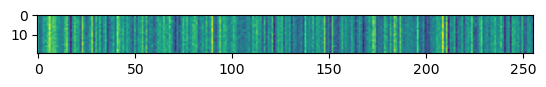

max out_cls tensor(0.3672, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-0.4529, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 7 18] [0 1]
cost_matrix (20, 2)
matched pred tensor([[-0.2529, -0.0857,  0.5400,  0.3442, -0.0129,  0.9370],
        [-0.3831,  0.1084,  0.6074,  0.7231, -0.0390,  0.8584]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.2597, 0.3035, 0.8305, 0.3715, 0.3517, 0.7791],
        [0.4424, 0.3602, 0.7819, 0.5647, 0.3643, 0.7765]], device='cuda:0')
pred cls tensor([[ 0.1456, -0.0266],
        [ 0.0974, -0.1176],
        [ 0.0323, -0.0627],
        [-0.2389, -0.1085],
        [ 0.2130, -0.1562],
        [ 0.0330, -0.1099],
        [ 0.0842, -0.1663],
        [ 0.1367, -0.1990],
        [ 0.2460, -0.1213],
        [-0.0525,  0.2288],
        [ 0.0008, -0.2158],
        [-0.1536,  0.1326],
        [ 0.2452, -0.1597],
        [ 0.0213, -0.1696],
        [-0.077

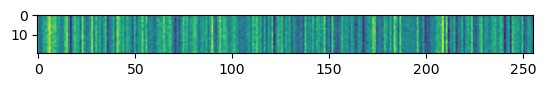

max out_cls tensor(0.4639, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-0.6167, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 5 19] [1 0]
cost_matrix (20, 2)
matched pred tensor([[-0.2297, -0.1689,  0.8521,  0.5698,  0.5107,  0.8315],
        [-0.2556, -0.0945,  0.2812,  0.3865,  0.3347,  0.7266]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4424, 0.3602, 0.7819, 0.5647, 0.3643, 0.7765],
        [0.2597, 0.3035, 0.8305, 0.3715, 0.3517, 0.7791]], device='cuda:0')
pred cls tensor([[ 0.1027, -0.0984],
        [ 0.1152, -0.2827],
        [-0.1251, -0.3613],
        [-0.0987, -0.2209],
        [ 0.0781, -0.3367],
        [ 0.2316, -0.3516],
        [ 0.2891, -0.4834],
        [ 0.0078, -0.2139],
        [ 0.1420, -0.1707],
        [ 0.1567, -0.2678],
        [ 0.1730, -0.3418],
        [-0.0784, -0.0879],
        [ 0.4092, -0.1562],
        [ 0.0676, -0.5415],
        [-0.120

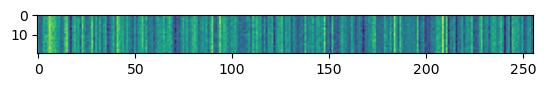

max out_cls tensor(0.5767, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-0.8374, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [14 18] [0 1]
cost_matrix (20, 2)
matched pred tensor([[ 0.1074,  0.3857,  0.4893,  0.2808,  0.4373,  0.8159],
        [-0.0466,  0.4956,  0.3909,  0.2185,  0.4421,  0.5747]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.0859, 0.4044, 0.7057, 0.1183, 0.3720, 0.7559],
        [0.2336, 0.4653, 0.5861, 0.2565, 0.4648, 0.5874]], device='cuda:0')
pred cls tensor([[ 0.4253, -0.5229],
        [ 0.2781, -0.6230],
        [ 0.2159, -0.4097],
        [ 0.1154, -0.7407],
        [ 0.4497, -0.5435],
        [ 0.3647, -0.5703],
        [ 0.2377, -0.5791],
        [ 0.1262, -0.3220],
        [ 0.3738, -0.7173],
        [ 0.1761, -0.3574],
        [ 0.3086, -0.7178],
        [-0.0224, -0.1919],
        [ 0.4624, -0.6196],
        [ 0.2852, -0.8013],
        [ 0.291

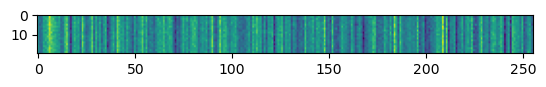

max out_cls tensor(0.6953, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-1.1064, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [15 19] [0 1]
cost_matrix (20, 2)
matched pred tensor([[-0.0215,  0.4053,  0.8140,  0.2712,  0.3237,  0.7476],
        [ 0.0955,  0.3005,  0.4634,  0.3467,  0.4358,  0.5435]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.0859, 0.4044, 0.7057, 0.1183, 0.3720, 0.7559],
        [0.2336, 0.4653, 0.5861, 0.2565, 0.4648, 0.5874]], device='cuda:0')
pred cls tensor([[ 0.1741, -0.4431],
        [ 0.3525, -0.5435],
        [-0.0291, -0.4060],
        [ 0.1707, -0.3989],
        [ 0.1847, -0.5542],
        [ 0.3345, -0.5176],
        [ 0.3286, -0.4541],
        [-0.0071, -0.7065],
        [ 0.3914, -0.5542],
        [ 0.3091, -0.2666],
        [ 0.3418, -0.8765],
        [ 0.1027, -0.5708],
        [ 0.4575, -0.6807],
        [ 0.5845, -0.7544],
        [ 0.107

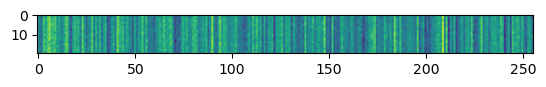

max out_cls tensor(1.0703, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-1.1934, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [5] [0]
cost_matrix (20, 1)
matched pred tensor([[ 0.2300,  0.3691,  0.6108, -0.0823,  0.4326,  0.7769]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.5981, 0.3687, 0.7605, 0.6640, 0.3216, 0.8161]], device='cuda:0')
pred cls tensor([[ 0.7246, -0.6338],
        [ 0.7383, -0.9199],
        [ 0.5415, -0.7144],
        [ 0.4907, -0.8613],
        [ 0.6704, -0.6548],
        [ 0.7056, -0.6240],
        [ 1.0225, -0.8916],
        [ 0.4219, -0.6577],
        [ 0.5029, -0.5850],
        [ 0.6802, -0.5864],
        [ 0.6992, -0.8721],
        [ 0.3406, -0.4402],
        [ 0.6675, -0.6162],
        [ 0.7622, -1.0713],
        [ 0.5513, -0.9966],
        [ 0.7744, -0.7866],
        [ 0.6299, -1.0518],
        [ 0.8081, -0.5518],
        [ 0.6812, -0.7324],
   

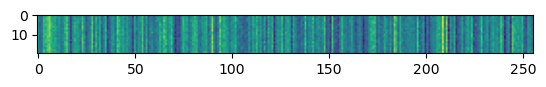

max out_cls tensor(1.0547, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-1.2676, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [19] [0]
cost_matrix (20, 1)
matched pred tensor([[0.5659, 0.1548, 0.6006, 0.3823, 0.0326, 0.8042]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.5981, 0.3687, 0.7605, 0.6640, 0.3216, 0.8161]], device='cuda:0')
pred cls tensor([[ 0.9492, -0.7202],
        [ 0.7700, -1.0127],
        [ 0.8335, -0.8022],
        [ 0.5103, -0.9033],
        [ 0.7163, -0.8867],
        [ 0.9438, -0.7041],
        [ 0.7803, -0.7090],
        [ 0.6680, -1.0361],
        [ 0.8394, -0.7554],
        [ 0.7397, -0.7666],
        [ 0.7705, -0.8472],
        [ 0.5996, -0.8872],
        [ 0.8755, -1.1035],
        [ 0.6743, -1.0400],
        [ 0.8647, -1.0322],
        [ 0.9692, -0.7275],
        [ 0.6367, -1.0205],
        [ 0.6660, -0.6948],
        [ 0.9375, -0.8208],
        

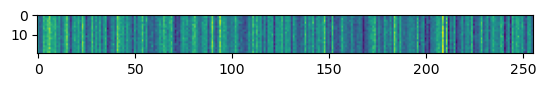

max out_cls tensor(1.2461, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-1.3848, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [11] [0]
cost_matrix (20, 1)
matched pred tensor([[0.7842, 0.3489, 0.4856, 0.4624, 0.5010, 0.8350]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4183, 0.2979, 0.8386, 0.5485, 0.2885, 0.8467]], device='cuda:0')
pred cls tensor([[ 0.9819, -1.1982],
        [ 1.2461, -1.2627],
        [ 0.9712, -1.1201],
        [ 0.7993, -0.9419],
        [ 0.8857, -1.0869],
        [ 0.8618, -1.2578],
        [ 0.9346, -1.0420],
        [ 0.9492, -1.1826],
        [ 1.0508, -0.9478],
        [ 0.9155, -0.7593],
        [ 1.0186, -1.1934],
        [ 0.9927, -0.8315],
        [ 1.0820, -0.9253],
        [ 0.9849, -1.3848],
        [ 1.0977, -1.1367],
        [ 0.9927, -1.2070],
        [ 0.9644, -1.1299],
        [ 0.9219, -1.0029],
        [ 0.7832, -1.0576],
        

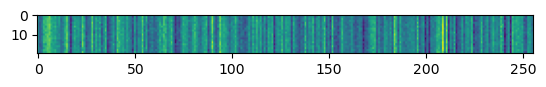

max out_cls tensor(1.2910, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-1.3965, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [14] [0]
cost_matrix (20, 1)
matched pred tensor([[0.4841, 0.3542, 0.6533, 0.4536, 0.2520, 0.8853]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4183, 0.2979, 0.8386, 0.5485, 0.2885, 0.8467]], device='cuda:0')
pred cls tensor([[ 1.1562, -1.1777],
        [ 1.0664, -1.2686],
        [ 0.9790, -1.2383],
        [ 0.6909, -1.2344],
        [ 0.8257, -0.9907],
        [ 1.1074, -1.2764],
        [ 0.8994, -1.3037],
        [ 1.0176, -1.0957],
        [ 1.1035, -1.2285],
        [ 1.1436, -1.0762],
        [ 0.8423, -1.1396],
        [ 0.8003, -0.8911],
        [ 1.0811, -1.0322],
        [ 0.8413, -1.3154],
        [ 0.9702, -1.3916],
        [ 1.1064, -1.2217],
        [ 0.7837, -1.3594],
        [ 0.9927, -0.9741],
        [ 0.8999, -1.1748],
        

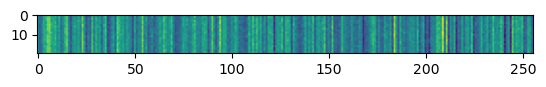

max out_cls tensor(1.3828, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-1.6748, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [11 17] [1 0]
cost_matrix (20, 2)
matched pred tensor([[0.8540, 0.3948, 0.8652, 0.4165, 0.8120, 0.4722],
        [0.9097, 0.2290, 0.7153, 0.2341, 0.6895, 0.7949]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4427, 0.3599, 0.7823, 0.5653, 0.3640, 0.7770],
        [0.2596, 0.3035, 0.8304, 0.3717, 0.3515, 0.7793]], device='cuda:0')
pred cls tensor([[ 1.1865, -1.4844],
        [ 1.3076, -1.5674],
        [ 1.0713, -1.1729],
        [ 0.9746, -1.4102],
        [ 1.2422, -1.3047],
        [ 1.0723, -1.1123],
        [ 1.0820, -1.3398],
        [ 1.1475, -1.5957],
        [ 1.3828, -1.3848],
        [ 1.0117, -1.2598],
        [ 1.1680, -1.1797],
        [ 0.8984, -1.1025],
        [ 1.2041, -1.3242],
        [ 0.9307, -1.6748],
        [ 1.0234, -1.5684],

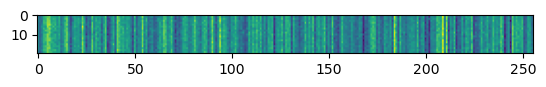

max out_cls tensor(1.3359, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-1.5645, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [4 8] [1 0]
cost_matrix (20, 2)
matched pred tensor([[1.0107, 0.4165, 0.6484, 0.5938, 0.4395, 0.4570],
        [0.7510, 0.5146, 0.6987, 0.3623, 0.3933, 0.5215]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4427, 0.3599, 0.7823, 0.5653, 0.3640, 0.7770],
        [0.2596, 0.3035, 0.8304, 0.3717, 0.3515, 0.7793]], device='cuda:0')
pred cls tensor([[ 1.0254, -1.1201],
        [ 1.1289, -1.1191],
        [ 1.0645, -1.3799],
        [ 0.9390, -1.5645],
        [ 1.2236, -1.2168],
        [ 1.0576, -1.2305],
        [ 1.1318, -1.1768],
        [ 1.1934, -1.3174],
        [ 1.1172, -1.2002],
        [ 1.2627, -1.1855],
        [ 1.2891, -1.3955],
        [ 1.0693, -1.1123],
        [ 1.3359, -1.1523],
        [ 1.2646, -1.4014],
        [ 1.1631, -1.4141],
 

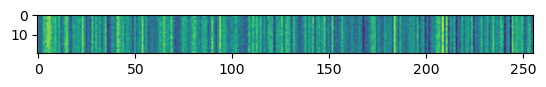

max out_cls tensor(1.5234, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-1.8643, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [10 17] [0 1]
cost_matrix (20, 2)
matched pred tensor([[0.9360, 0.5273, 0.7720, 0.4539, 0.8296, 0.5034],
        [0.8389, 0.1675, 0.8589, 0.3770, 0.7876, 0.7681]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4292, 0.3165, 0.8180, 0.5648, 0.3208, 0.8136],
        [0.6574, 0.3061, 0.8399, 0.8426, 0.3152, 0.8315]], device='cuda:0')
pred cls tensor([[ 1.2412, -1.2891],
        [ 1.2754, -1.6689],
        [ 1.0518, -1.5459],
        [ 1.1992, -1.5840],
        [ 1.2676, -1.4775],
        [ 1.2246, -1.5225],
        [ 1.2422, -1.4736],
        [ 0.9722, -1.5664],
        [ 1.3574, -1.3828],
        [ 1.1289, -1.7051],
        [ 1.3203, -1.7627],
        [ 1.2559, -1.1992],
        [ 1.3262, -1.5576],
        [ 1.2051, -1.5703],
        [ 1.0352, -1.8643],

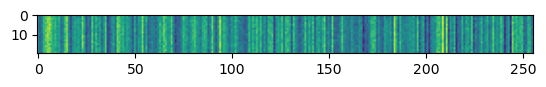

max out_cls tensor(1.5244, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-1.7373, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 4 17] [0 1]
cost_matrix (20, 2)
matched pred tensor([[0.7759, 0.2427, 1.0059, 0.5249, 0.5073, 0.7246],
        [0.8882, 0.1870, 0.9512, 0.2683, 0.7749, 0.7817]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4292, 0.3165, 0.8180, 0.5648, 0.3208, 0.8136],
        [0.6574, 0.3061, 0.8399, 0.8426, 0.3152, 0.8315]], device='cuda:0')
pred cls tensor([[ 1.3027, -1.2246],
        [ 1.2646, -1.6670],
        [ 1.2100, -1.5352],
        [ 0.9829, -1.5107],
        [ 1.1660, -1.3965],
        [ 1.3105, -1.3555],
        [ 1.3086, -1.3271],
        [ 0.8779, -1.6855],
        [ 1.3486, -1.2373],
        [ 1.3271, -1.4814],
        [ 1.1504, -1.4160],
        [ 1.0449, -1.2168],
        [ 1.2383, -1.5049],
        [ 1.1504, -1.5566],
        [ 1.2207, -1.4580],

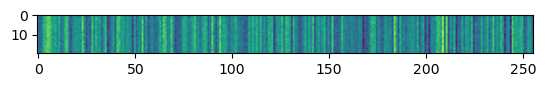

max out_cls tensor(1.6289, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-1.8984, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [0 8] [0 1]
cost_matrix (20, 2)
matched pred tensor([[1.0293, 0.3247, 1.2031, 0.3687, 0.4487, 0.5889],
        [1.0186, 0.3618, 1.2529, 0.4775, 0.4536, 0.7402]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.2597, 0.3035, 0.8305, 0.3715, 0.3517, 0.7791],
        [0.4424, 0.3602, 0.7819, 0.5647, 0.3643, 0.7765]], device='cuda:0')
pred cls tensor([[ 1.5078, -1.4521],
        [ 1.3809, -1.6699],
        [ 1.2910, -1.7275],
        [ 1.1094, -1.7158],
        [ 1.2822, -1.6045],
        [ 1.3164, -1.5898],
        [ 1.2285, -1.5156],
        [ 1.3877, -1.6846],
        [ 1.5723, -1.5371],
        [ 1.5283, -1.5801],
        [ 1.2773, -1.6768],
        [ 1.3652, -1.4668],
        [ 1.5342, -1.3955],
        [ 1.4385, -1.8271],
        [ 1.3330, -1.8359],
 

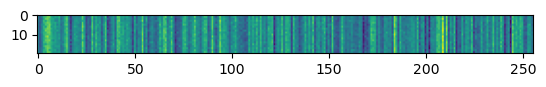

max out_cls tensor(1.7705, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.0762, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [12 13] [1 0]
cost_matrix (20, 2)
matched pred tensor([[0.9419, 0.3616, 1.1572, 0.3296, 0.4385, 0.7466],
        [0.7690, 0.4092, 1.0039, 0.2373, 0.2815, 0.7739]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4424, 0.3602, 0.7819, 0.5647, 0.3643, 0.7765],
        [0.2597, 0.3035, 0.8305, 0.3715, 0.3517, 0.7791]], device='cuda:0')
pred cls tensor([[ 1.5967, -1.5361],
        [ 1.3125, -1.6602],
        [ 1.3398, -1.5820],
        [ 1.2031, -1.5557],
        [ 1.3184, -1.4600],
        [ 1.5439, -1.4639],
        [ 1.5664, -1.5693],
        [ 1.1641, -1.6338],
        [ 1.5488, -1.5107],
        [ 1.4219, -1.5566],
        [ 1.4258, -1.8936],
        [ 1.4404, -1.3691],
        [ 1.7705, -1.5342],
        [ 1.4502, -1.7725],
        [ 1.2480, -1.7969],

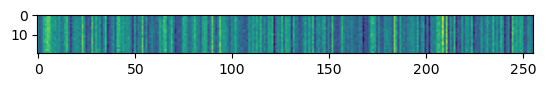

max out_cls tensor(1.6973, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.0254, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [12 19] [0 1]
cost_matrix (20, 2)
matched pred tensor([[0.7974, 0.2402, 1.0908, 0.4473, 0.1747, 0.7085],
        [0.8223, 0.1909, 0.9517, 0.7817, 0.3560, 0.7471]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.2596, 0.3035, 0.8304, 0.3717, 0.3515, 0.7793],
        [0.4427, 0.3599, 0.7823, 0.5653, 0.3640, 0.7770]], device='cuda:0')
pred cls tensor([[ 1.5928, -1.6758],
        [ 1.4541, -1.6064],
        [ 1.2852, -1.6553],
        [ 1.1787, -1.7002],
        [ 1.5820, -1.5850],
        [ 1.4531, -1.6553],
        [ 1.3711, -1.5527],
        [ 1.4746, -1.6250],
        [ 1.6973, -1.6387],
        [ 1.6367, -1.4893],
        [ 1.4961, -1.7021],
        [ 1.2090, -1.3330],
        [ 1.6826, -1.8828],
        [ 1.3301, -1.8857],
        [ 1.2773, -1.5439],

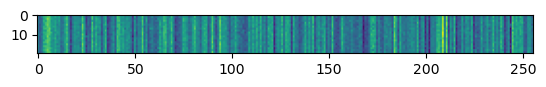

max out_cls tensor(1.7188, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-1.9922, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 4 13] [1 0]
cost_matrix (20, 2)
matched pred tensor([[0.8701, 0.3655, 0.8521, 0.5522, 0.3313, 0.7461],
        [0.8247, 0.2705, 0.7827, 0.3579, 0.2004, 0.6978]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4427, 0.3599, 0.7823, 0.5653, 0.3640, 0.7770],
        [0.2596, 0.3035, 0.8304, 0.3717, 0.3515, 0.7793]], device='cuda:0')
pred cls tensor([[ 1.6055, -1.5166],
        [ 1.3516, -1.9922],
        [ 1.2109, -1.7188],
        [ 1.2129, -1.8037],
        [ 1.5000, -1.8057],
        [ 1.7188, -1.7051],
        [ 1.2891, -1.7217],
        [ 1.2881, -1.8066],
        [ 1.5957, -1.5879],
        [ 1.5938, -1.7031],
        [ 1.5107, -1.7949],
        [ 1.2969, -1.3701],
        [ 1.4141, -1.6748],
        [ 1.3867, -1.9121],
        [ 1.3926, -1.8896],

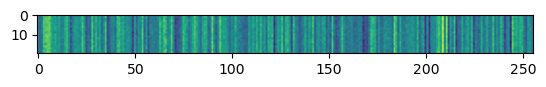

max out_cls tensor(1.7148, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.2422, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [6] [0]
cost_matrix (20, 1)
matched pred tensor([[0.8677, 0.3608, 0.9878, 0.6934, 0.3484, 0.7651]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.5981, 0.3687, 0.7605, 0.6640, 0.3216, 0.8161]], device='cuda:0')
pred cls tensor([[ 1.5742, -1.5801],
        [ 1.3457, -1.9795],
        [ 1.2148, -1.8320],
        [ 1.3809, -1.7354],
        [ 1.4141, -1.7549],
        [ 1.5508, -1.8311],
        [ 1.6348, -1.7930],
        [ 1.3496, -1.9795],
        [ 1.6504, -1.8975],
        [ 1.6934, -1.7178],
        [ 1.5391, -2.0254],
        [ 1.3984, -1.6543],
        [ 1.5996, -1.7627],
        [ 1.4590, -1.7920],
        [ 1.4531, -2.1699],
        [ 1.5977, -1.6318],
        [ 1.4453, -2.1016],
        [ 1.4062, -1.7998],
        [ 1.5684, -1.7285],
        [

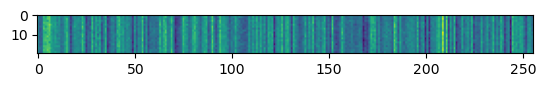

max out_cls tensor(1.7891, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.1406, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [1] [0]
cost_matrix (20, 1)
matched pred tensor([[0.7798, 0.3398, 0.7627, 0.6343, 0.1150, 0.8926]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.5981, 0.3687, 0.7605, 0.6640, 0.3216, 0.8161]], device='cuda:0')
pred cls tensor([[ 1.6758, -1.7256],
        [ 1.4043, -1.8184],
        [ 1.4316, -1.7666],
        [ 1.3555, -1.8359],
        [ 1.5391, -1.7549],
        [ 1.4277, -1.8711],
        [ 1.3984, -1.8730],
        [ 1.3184, -2.0742],
        [ 1.7891, -1.9053],
        [ 1.4629, -1.4805],
        [ 1.4922, -1.8447],
        [ 1.1934, -1.7285],
        [ 1.7070, -1.9102],
        [ 1.4121, -2.1406],
        [ 1.4531, -2.0605],
        [ 1.4570, -1.5791],
        [ 1.3770, -2.0762],
        [ 1.4883, -1.7910],
        [ 1.2695, -1.7578],
        [

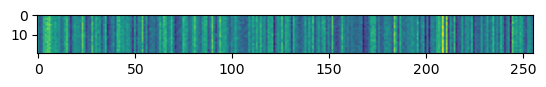

max out_cls tensor(1.7324, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.0234, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [1 4] [1 0]
cost_matrix (20, 2)
matched pred tensor([[0.5425, 0.3291, 0.6431, 0.7271, 0.1823, 0.6372],
        [0.3872, 0.2222, 0.7710, 0.9189, 0.3376, 1.0176]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4386, 0.3586, 0.7839, 0.5645, 0.3595, 0.7828],
        [0.2565, 0.3105, 0.8238, 0.3677, 0.3526, 0.7780]], device='cuda:0')
pred cls tensor([[ 1.5898, -1.5342],
        [ 1.4385, -1.8018],
        [ 1.4043, -1.9463],
        [ 1.4766, -1.9697],
        [ 1.3281, -1.9326],
        [ 1.4316, -2.0234],
        [ 1.5801, -1.9355],
        [ 1.4570, -1.7812],
        [ 1.4863, -1.9541],
        [ 1.4629, -1.8467],
        [ 1.5078, -1.8447],
        [ 1.5117, -1.5410],
        [ 1.7188, -1.6855],
        [ 1.7324, -1.9590],
        [ 1.2852, -1.9404],
 

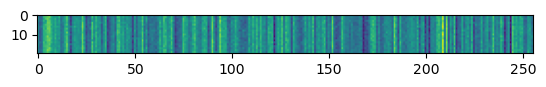

max out_cls tensor(1.8008, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.1816, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [14 19] [0 1]
cost_matrix (20, 2)
matched pred tensor([[0.5010, 0.3303, 0.8701, 0.4185, 0.4824, 1.1289],
        [0.6216, 0.3738, 0.7466, 0.5674, 0.4375, 1.0996]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.2565, 0.3105, 0.8238, 0.3677, 0.3526, 0.7780],
        [0.4386, 0.3586, 0.7839, 0.5645, 0.3595, 0.7828]], device='cuda:0')
pred cls tensor([[ 1.7246, -1.8525],
        [ 1.5547, -1.9883],
        [ 1.3809, -1.9883],
        [ 1.3145, -1.7871],
        [ 1.3867, -1.8926],
        [ 1.3662, -1.8799],
        [ 1.4951, -1.8848],
        [ 1.2969, -2.0801],
        [ 1.5361, -2.0410],
        [ 1.4258, -1.8027],
        [ 1.4727, -2.1484],
        [ 1.2949, -1.8340],
        [ 1.3145, -2.0137],
        [ 1.4492, -2.0781],
        [ 1.2119, -2.1816],

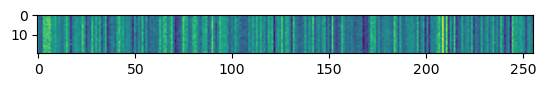

max out_cls tensor(1.7793, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.3164, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [15] [0]
cost_matrix (20, 1)
matched pred tensor([[0.5093, 0.2991, 0.7798, 0.4551, 0.3389, 1.1211]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.5981, 0.3687, 0.7605, 0.6640, 0.3216, 0.8161]], device='cuda:0')
pred cls tensor([[ 1.5684, -1.8174],
        [ 1.5469, -2.1797],
        [ 1.4062, -2.1055],
        [ 1.4258, -2.3164],
        [ 1.5156, -1.8672],
        [ 1.6309, -1.9795],
        [ 1.5000, -1.9033],
        [ 1.3906, -2.2051],
        [ 1.5078, -1.9355],
        [ 1.5586, -1.9111],
        [ 1.5039, -1.8662],
        [ 1.2793, -1.8174],
        [ 1.6602, -2.0332],
        [ 1.7207, -2.0508],
        [ 1.3516, -2.1484],
        [ 1.4727, -1.8291],
        [ 1.4492, -2.2852],
        [ 1.6641, -2.1113],
        [ 1.4727, -2.0039],
        

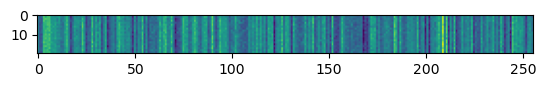

max out_cls tensor(1.8398, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.1914, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [1] [0]
cost_matrix (20, 1)
matched pred tensor([[0.6040, 0.1396, 0.7031, 0.8511, 0.1794, 0.7227]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.5981, 0.3687, 0.7605, 0.6640, 0.3216, 0.8161]], device='cuda:0')
pred cls tensor([[ 1.7988, -1.6943],
        [ 1.5000, -2.1504],
        [ 1.5469, -1.7852],
        [ 1.6719, -2.1328],
        [ 1.5312, -1.8447],
        [ 1.4531, -1.9785],
        [ 1.6270, -1.7676],
        [ 1.5195, -1.8057],
        [ 1.4141, -1.8789],
        [ 1.6680, -1.9102],
        [ 1.5586, -2.0078],
        [ 1.6602, -1.8408],
        [ 1.8398, -2.0039],
        [ 1.6074, -1.8721],
        [ 1.6113, -1.9102],
        [ 1.4824, -1.8369],
        [ 1.5156, -2.1914],
        [ 1.8398, -1.9033],
        [ 1.4609, -1.9453],
        [

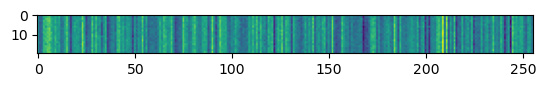

max out_cls tensor(1.6523, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.4727, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 6 13] [1 0]
cost_matrix (20, 2)
matched pred tensor([[0.2456, 0.3701, 0.5161, 0.5620, 0.3464, 0.6489],
        [0.2883, 0.3315, 0.6802, 0.5396, 0.6812, 0.8501]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4386, 0.3586, 0.7839, 0.5645, 0.3595, 0.7828],
        [0.2565, 0.3105, 0.8238, 0.3677, 0.3526, 0.7780]], device='cuda:0')
pred cls tensor([[ 1.5332, -2.1074],
        [ 1.4004, -2.1562],
        [ 1.3809, -2.1699],
        [ 1.1777, -2.2363],
        [ 1.5020, -1.9561],
        [ 1.0996, -2.0684],
        [ 1.3438, -2.0449],
        [ 1.2910, -2.1621],
        [ 1.6523, -1.8545],
        [ 1.5684, -2.1797],
        [ 1.4258, -2.0605],
        [ 1.3516, -1.8193],
        [ 1.5566, -2.2207],
        [ 1.4805, -2.4727],
        [ 1.5957, -2.3652],

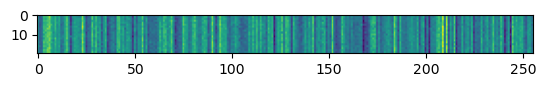

max out_cls tensor(1.8066, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.4082, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [11 13] [1 0]
cost_matrix (20, 2)
matched pred tensor([[0.4360, 0.2435, 0.8789, 0.5972, 0.6011, 0.8115],
        [0.2668, 0.2142, 0.9541, 0.5278, 0.5649, 0.9658]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4386, 0.3586, 0.7839, 0.5645, 0.3595, 0.7828],
        [0.2565, 0.3105, 0.8238, 0.3677, 0.3526, 0.7780]], device='cuda:0')
pred cls tensor([[ 1.4570, -2.1777],
        [ 1.5371, -2.0586],
        [ 1.3105, -2.1875],
        [ 1.2734, -2.3809],
        [ 1.5391, -2.3574],
        [ 1.3535, -1.9912],
        [ 1.3223, -2.1211],
        [ 1.2695, -2.2461],
        [ 1.5078, -1.8926],
        [ 1.4473, -2.0059],
        [ 1.5449, -2.0215],
        [ 1.6562, -2.0352],
        [ 1.5703, -2.0488],
        [ 1.8066, -2.3340],
        [ 1.4805, -2.2617],

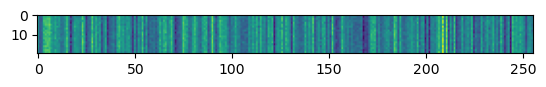

max out_cls tensor(1.7480, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.4609, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [7] [0]
cost_matrix (20, 1)
matched pred tensor([[0.4954, 0.3171, 0.6436, 0.6089, 0.2534, 0.9980]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4183, 0.2979, 0.8386, 0.5485, 0.2885, 0.8467]], device='cuda:0')
pred cls tensor([[ 1.6348, -2.3301],
        [ 1.6846, -2.3438],
        [ 1.6611, -2.2363],
        [ 1.3301, -2.1914],
        [ 1.4385, -2.0098],
        [ 1.5156, -2.3574],
        [ 1.5459, -1.9893],
        [ 1.2334, -2.1270],
        [ 1.5156, -2.3477],
        [ 1.7480, -2.0781],
        [ 1.4609, -2.2109],
        [ 1.3721, -1.9814],
        [ 1.7275, -2.2500],
        [ 1.6045, -2.0566],
        [ 1.4424, -2.0352],
        [ 1.5830, -1.9609],
        [ 1.3682, -2.1152],
        [ 1.6182, -2.1035],
        [ 1.7295, -2.0469],
        [

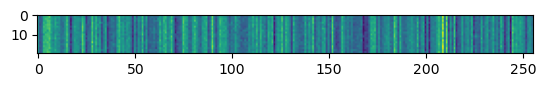

max out_cls tensor(1.7637, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.3750, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [19] [0]
cost_matrix (20, 1)
matched pred tensor([[0.2754, 0.2057, 0.8369, 0.6895, 0.2205, 0.9385]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4183, 0.2979, 0.8386, 0.5485, 0.2885, 0.8467]], device='cuda:0')
pred cls tensor([[ 1.4785, -1.9951],
        [ 1.5742, -2.2539],
        [ 1.4346, -2.1699],
        [ 1.4922, -2.0605],
        [ 1.4463, -2.0391],
        [ 1.5234, -2.1641],
        [ 1.5332, -2.2598],
        [ 1.4209, -2.2402],
        [ 1.6904, -2.0156],
        [ 1.5752, -2.0645],
        [ 1.4521, -2.0410],
        [ 1.3174, -1.7578],
        [ 1.7637, -2.0449],
        [ 1.5508, -2.0195],
        [ 1.3447, -2.1660],
        [ 1.6475, -1.8789],
        [ 1.4189, -2.0762],
        [ 1.6084, -2.1895],
        [ 1.5176, -2.1289],
        

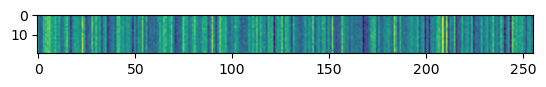

max out_cls tensor(1.7598, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.5000, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 1  8 16 18] [1 0 3 2]
cost_matrix (20, 4)
matched pred tensor([[0.3293, 0.5903, 0.5518, 0.5830, 0.3958, 0.4688],
        [0.3516, 0.5859, 0.7905, 0.6616, 0.4001, 0.8965],
        [0.3481, 0.4951, 0.5020, 0.7500, 0.3369, 0.6079],
        [0.4973, 0.5293, 0.5269, 0.7300, 0.3884, 0.6050]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.6696, 0.4595, 0.5994, 0.6933, 0.4625, 0.5921],
        [0.4850, 0.4104, 0.7034, 0.5177, 0.4313, 0.6627],
        [0.7356, 0.4736, 0.5652, 0.7523, 0.4713, 0.5711],
        [0.7100, 0.4697, 0.5691, 0.7239, 0.4718, 0.5641]], device='cuda:0')
pred cls tensor([[ 1.5850, -2.2402],
        [ 1.6592, -2.1875],
        [ 1.2744, -2.1777],
        [ 1.4609, -2.1895],
        [ 1.5693, -2.1738],
        [ 1.6416, -2.0488],
        [

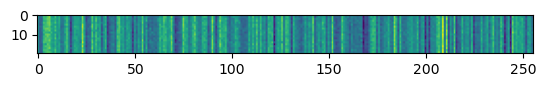

max out_cls tensor(1.7910, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.4375, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 1  9 11 16] [2 3 0 1]
cost_matrix (20, 4)
matched pred tensor([[0.1781, 0.2766, 0.7065, 0.7192, 0.4402, 0.4531],
        [0.5801, 0.6611, 0.5054, 0.7881, 0.4836, 0.9146],
        [0.2842, 0.3188, 0.5400, 0.5977, 0.6733, 0.7197],
        [0.4646, 0.1560, 0.6191, 0.6855, 0.3198, 0.8682]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.7100, 0.4697, 0.5691, 0.7239, 0.4718, 0.5641],
        [0.7356, 0.4736, 0.5652, 0.7523, 0.4713, 0.5711],
        [0.4850, 0.4104, 0.7034, 0.5177, 0.4313, 0.6627],
        [0.6696, 0.4595, 0.5994, 0.6933, 0.4625, 0.5921]], device='cuda:0')
pred cls tensor([[ 1.7900, -2.0293],
        [ 1.5830, -2.4375],
        [ 1.4775, -2.3340],
        [ 1.4297, -1.9541],
        [ 1.4795, -2.0684],
        [ 1.3760, -2.4121],
        [

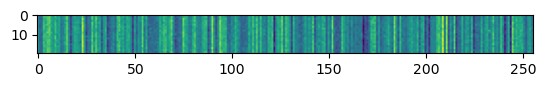

max out_cls tensor(1.7432, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.6484, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 7 10] [1 0]
cost_matrix (20, 2)
matched pred tensor([[0.3188, 0.4502, 0.7222, 0.6328, 0.3704, 0.4739],
        [0.3213, 0.4009, 0.7261, 0.4565, 0.4966, 0.8901]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4427, 0.3599, 0.7823, 0.5653, 0.3640, 0.7770],
        [0.2596, 0.3035, 0.8304, 0.3717, 0.3515, 0.7793]], device='cuda:0')
pred cls tensor([[ 1.5137, -2.4902],
        [ 1.3594, -2.5215],
        [ 1.3975, -2.2070],
        [ 1.5566, -2.3301],
        [ 1.5322, -2.2266],
        [ 1.5391, -2.4531],
        [ 1.6357, -2.1875],
        [ 1.5586, -2.6484],
        [ 1.6445, -2.2148],
        [ 1.6143, -2.3008],
        [ 1.6475, -2.5098],
        [ 1.3018, -2.0410],
        [ 1.6465, -2.3203],
        [ 1.5615, -2.2441],
        [ 1.3633, -2.2715],

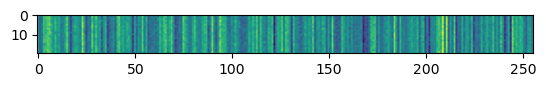

max out_cls tensor(1.7646, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.5312, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 3 16] [0 1]
cost_matrix (20, 2)
matched pred tensor([[0.1572, 0.2874, 0.7930, 0.4666, 0.4194, 0.7476],
        [0.2812, 0.3970, 0.7573, 0.5537, 0.1760, 0.7422]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.2596, 0.3035, 0.8304, 0.3717, 0.3515, 0.7793],
        [0.4427, 0.3599, 0.7823, 0.5653, 0.3640, 0.7770]], device='cuda:0')
pred cls tensor([[ 1.5254, -2.5312],
        [ 1.6309, -2.2969],
        [ 1.5146, -2.2070],
        [ 1.6182, -2.4316],
        [ 1.6562, -2.1641],
        [ 1.4160, -2.1797],
        [ 1.4160, -2.3457],
        [ 1.4297, -2.4844],
        [ 1.6973, -2.2148],
        [ 1.5020, -2.0742],
        [ 1.3857, -2.2754],
        [ 1.3789, -2.0078],
        [ 1.5518, -2.2578],
        [ 1.2920, -2.4180],
        [ 1.3848, -2.4473],

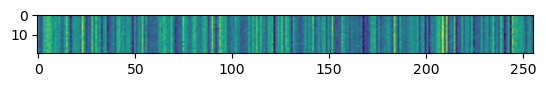

max out_cls tensor(1.7666, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.6465, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [14] [0]
cost_matrix (20, 1)
matched pred tensor([[0.2273, 0.5239, 0.7490, 0.6753, 0.4661, 0.6289]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.8035, 0.4133, 0.6996, 0.8545, 0.4274, 0.6721]], device='cuda:0')
pred cls tensor([[ 1.6172, -2.2441],
        [ 1.7393, -2.6465],
        [ 1.4658, -2.4531],
        [ 1.4004, -2.5996],
        [ 1.4268, -2.2441],
        [ 1.7256, -2.2363],
        [ 1.5391, -2.2793],
        [ 1.4102, -2.2715],
        [ 1.4854, -2.2324],
        [ 1.5029, -2.3906],
        [ 1.5811, -2.2344],
        [ 1.3438, -2.2129],
        [ 1.5791, -2.4707],
        [ 1.3857, -2.5176],
        [ 1.4053, -2.4355],
        [ 1.4863, -2.0566],
        [ 1.6934, -2.2402],
        [ 1.7041, -2.3008],
        [ 1.5020, -2.2988],
        

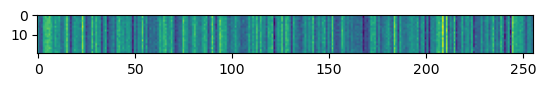

max out_cls tensor(1.7939, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.5410, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [3] [0]
cost_matrix (20, 1)
matched pred tensor([[0.3362, 0.4275, 0.6958, 0.7388, 0.2695, 1.0010]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.8035, 0.4133, 0.6996, 0.8545, 0.4274, 0.6721]], device='cuda:0')
pred cls tensor([[ 1.6660, -2.2754],
        [ 1.7559, -2.5410],
        [ 1.5449, -2.3516],
        [ 1.5049, -2.3789],
        [ 1.2646, -2.2344],
        [ 1.4189, -2.3652],
        [ 1.5781, -2.2598],
        [ 1.4971, -2.2500],
        [ 1.6309, -2.3105],
        [ 1.5107, -2.2402],
        [ 1.5039, -2.2871],
        [ 1.5098, -2.1504],
        [ 1.7236, -2.2480],
        [ 1.4385, -2.4434],
        [ 1.4639, -2.5039],
        [ 1.6201, -2.2793],
        [ 1.5010, -2.4453],
        [ 1.6689, -2.1719],
        [ 1.4590, -2.4199],
        [

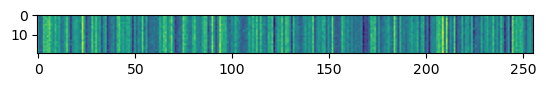

max out_cls tensor(1.8486, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.5586, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [2 3] [0 1]
cost_matrix (20, 2)
matched pred tensor([[0.3433, 0.0848, 0.8257, 0.4285, 0.3586, 0.8340],
        [0.3547, 0.2898, 0.7563, 0.4329, 0.2146, 0.7339]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.2597, 0.3035, 0.8305, 0.3715, 0.3517, 0.7791],
        [0.4424, 0.3602, 0.7819, 0.5647, 0.3643, 0.7765]], device='cuda:0')
pred cls tensor([[ 1.5771, -2.4668],
        [ 1.6494, -2.3984],
        [ 1.7432, -2.4668],
        [ 1.6387, -2.3711],
        [ 1.6045, -2.3398],
        [ 1.6162, -2.4395],
        [ 1.5176, -2.3281],
        [ 1.5850, -2.4043],
        [ 1.6807, -2.3652],
        [ 1.5908, -2.2383],
        [ 1.4629, -2.5527],
        [ 1.4541, -2.2715],
        [ 1.6709, -2.4160],
        [ 1.5186, -2.3281],
        [ 1.6104, -2.4121],
 

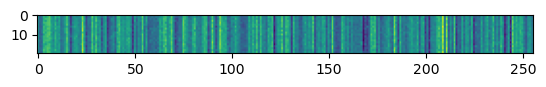

max out_cls tensor(1.8389, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.6250, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 2 11] [0 1]
cost_matrix (20, 2)
matched pred tensor([[0.3298, 0.1863, 0.9341, 0.3677, 0.2581, 0.8047],
        [0.2651, 0.3586, 0.9956, 0.6055, 0.3054, 0.7075]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.2597, 0.3035, 0.8305, 0.3715, 0.3517, 0.7791],
        [0.4424, 0.3602, 0.7819, 0.5647, 0.3643, 0.7765]], device='cuda:0')
pred cls tensor([[ 1.5986, -2.3359],
        [ 1.4033, -2.3945],
        [ 1.5537, -2.2051],
        [ 1.4463, -2.4434],
        [ 1.6104, -2.2207],
        [ 1.5410, -2.4023],
        [ 1.6670, -2.2793],
        [ 1.4990, -2.3477],
        [ 1.5693, -2.3652],
        [ 1.6309, -2.2637],
        [ 1.5283, -2.3926],
        [ 1.5000, -2.1582],
        [ 1.6396, -2.4160],
        [ 1.3867, -2.5137],
        [ 1.2607, -2.5312],

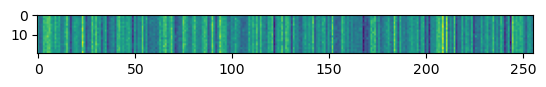

max out_cls tensor(1.8174, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.6855, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [2 8] [1 0]
cost_matrix (20, 2)
matched pred tensor([[0.4451, 0.2317, 0.7861, 0.4722, 0.3259, 0.7617],
        [0.2148, 0.2019, 0.9131, 0.6074, 0.3044, 0.7212]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4386, 0.3586, 0.7839, 0.5645, 0.3595, 0.7828],
        [0.2565, 0.3105, 0.8238, 0.3677, 0.3526, 0.7780]], device='cuda:0')
pred cls tensor([[ 1.7158, -2.5234],
        [ 1.6484, -2.5410],
        [ 1.5273, -2.4746],
        [ 1.4648, -2.5195],
        [ 1.6221, -2.5117],
        [ 1.4414, -2.3418],
        [ 1.7568, -2.5410],
        [ 1.4805, -2.6289],
        [ 1.7510, -2.4004],
        [ 1.6680, -2.4492],
        [ 1.5742, -2.4531],
        [ 1.7891, -2.0469],
        [ 1.7988, -2.6855],
        [ 1.7451, -2.4512],
        [ 1.4395, -2.4805],
 

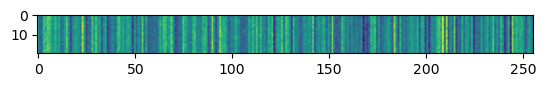

max out_cls tensor(1.9326, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.7051, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [0 2] [0 1]
cost_matrix (20, 2)
matched pred tensor([[0.2739, 0.1895, 0.9312, 0.2407, 0.3357, 0.7080],
        [0.4470, 0.2756, 0.7554, 0.5024, 0.6934, 0.7051]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.2565, 0.3105, 0.8238, 0.3677, 0.3526, 0.7780],
        [0.4386, 0.3586, 0.7839, 0.5645, 0.3595, 0.7828]], device='cuda:0')
pred cls tensor([[ 1.7119, -2.5059],
        [ 1.5479, -2.7031],
        [ 1.6904, -2.2695],
        [ 1.2939, -2.7051],
        [ 1.5293, -2.3301],
        [ 1.5889, -2.4941],
        [ 1.5771, -2.3516],
        [ 1.3291, -2.3945],
        [ 1.6230, -2.5820],
        [ 1.6182, -2.3516],
        [ 1.6885, -2.5332],
        [ 1.3779, -2.1465],
        [ 1.6104, -2.4121],
        [ 1.5908, -2.5742],
        [ 1.5195, -2.4941],
 

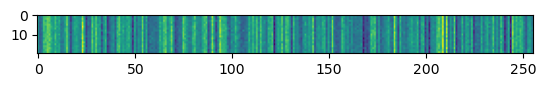

max out_cls tensor(1.8623, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.5742, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 8 17] [1 0]
cost_matrix (20, 2)
matched pred tensor([[0.4553, 0.4150, 0.7886, 0.5444, 0.3489, 0.7168],
        [0.1564, 0.1010, 0.7217, 0.3611, 0.3665, 0.8643]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4427, 0.3599, 0.7823, 0.5653, 0.3640, 0.7770],
        [0.2596, 0.3035, 0.8304, 0.3717, 0.3515, 0.7793]], device='cuda:0')
pred cls tensor([[ 1.7744, -2.4160],
        [ 1.5762, -2.4805],
        [ 1.5830, -2.4590],
        [ 1.5645, -2.2520],
        [ 1.7412, -2.1641],
        [ 1.6182, -2.2930],
        [ 1.5801, -2.4043],
        [ 1.4648, -2.4844],
        [ 1.5693, -2.3340],
        [ 1.5957, -2.2988],
        [ 1.5908, -2.3945],
        [ 1.5225, -2.3242],
        [ 1.8008, -2.4395],
        [ 1.5869, -2.4121],
        [ 1.5537, -2.5176],

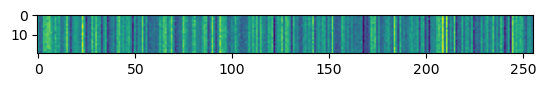

max out_cls tensor(1.8975, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.6309, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [11 17] [1 0]
cost_matrix (20, 2)
matched pred tensor([[0.3496, 0.2812, 0.9014, 0.6807, 0.4055, 0.6758],
        [0.3582, 0.4224, 0.7651, 0.4258, 0.2571, 0.6865]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4427, 0.3599, 0.7823, 0.5653, 0.3640, 0.7770],
        [0.2596, 0.3035, 0.8304, 0.3717, 0.3515, 0.7793]], device='cuda:0')
pred cls tensor([[ 1.6416, -2.2715],
        [ 1.6729, -2.3730],
        [ 1.3779, -2.6250],
        [ 1.3984, -2.6133],
        [ 1.5186, -2.2168],
        [ 1.6982, -2.3652],
        [ 1.7412, -2.4121],
        [ 1.5967, -2.5410],
        [ 1.6865, -2.6309],
        [ 1.6846, -2.3340],
        [ 1.7188, -2.3477],
        [ 1.6553, -2.2051],
        [ 1.7627, -2.5527],
        [ 1.5771, -2.6172],
        [ 1.6084, -2.3535],

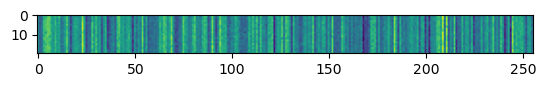

max out_cls tensor(1.9746, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.6426, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 2  6  7 18] [0 3 1 2]
cost_matrix (20, 4)
matched pred tensor([[0.5059, 0.4016, 1.0088, 0.5190, 0.4990, 0.7397],
        [0.3828, 0.3311, 0.7485, 0.7549, 0.5156, 0.5454],
        [0.5571, 0.4026, 0.8931, 0.6270, 0.3660, 0.6885],
        [0.4495, 0.6060, 0.6104, 0.6479, 0.6172, 0.4226]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4850, 0.4104, 0.7034, 0.5177, 0.4313, 0.6627],
        [0.7356, 0.4736, 0.5652, 0.7523, 0.4713, 0.5711],
        [0.6696, 0.4595, 0.5994, 0.6933, 0.4625, 0.5921],
        [0.7100, 0.4697, 0.5691, 0.7239, 0.4718, 0.5641]], device='cuda:0')
pred cls tensor([[ 1.6465, -2.3711],
        [ 1.9160, -2.4727],
        [ 1.7881, -2.2520],
        [ 1.5596, -2.5605],
        [ 1.3945, -2.3262],
        [ 1.6709, -2.2500],
        [

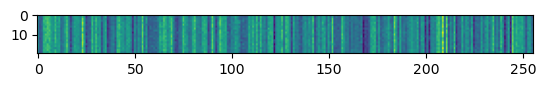

max out_cls tensor(1.9736, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.7969, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 6  8  9 12] [2 3 1 0]
cost_matrix (20, 4)
matched pred tensor([[0.6885, 0.4041, 0.6665, 0.7051, 0.6279, 0.3196],
        [0.6304, 0.4714, 0.8208, 0.6826, 0.5400, 0.5684],
        [0.5576, 0.5820, 0.5928, 0.4150, 0.4060, 0.5630],
        [0.5190, 0.3506, 0.6694, 0.4741, 0.3687, 0.4893]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.7100, 0.4697, 0.5691, 0.7239, 0.4718, 0.5641],
        [0.7356, 0.4736, 0.5652, 0.7523, 0.4713, 0.5711],
        [0.6696, 0.4595, 0.5994, 0.6933, 0.4625, 0.5921],
        [0.4850, 0.4104, 0.7034, 0.5177, 0.4313, 0.6627]], device='cuda:0')
pred cls tensor([[ 1.6797, -2.3770],
        [ 1.9111, -2.5938],
        [ 1.7744, -2.5566],
        [ 1.5146, -2.5234],
        [ 1.8066, -2.4902],
        [ 1.6387, -2.5352],
        [

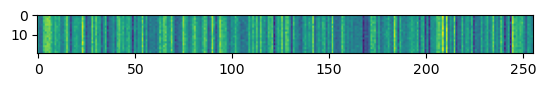

max out_cls tensor(1.9736, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.7461, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [5] [0]
cost_matrix (20, 1)
matched pred tensor([[0.5698, 0.2583, 0.9873, 0.6011, 0.4846, 0.6748]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.8035, 0.4133, 0.6996, 0.8545, 0.4274, 0.6721]], device='cuda:0')
pred cls tensor([[ 1.5332, -2.3574],
        [ 1.7773, -2.4277],
        [ 1.6270, -2.5215],
        [ 1.5020, -2.4512],
        [ 1.8262, -2.1621],
        [ 1.8018, -2.4160],
        [ 1.5264, -2.6719],
        [ 1.4658, -2.2363],
        [ 1.7314, -2.3984],
        [ 1.3916, -2.2773],
        [ 1.6025, -2.2598],
        [ 1.5225, -2.2168],
        [ 1.9736, -2.4512],
        [ 1.8037, -2.6504],
        [ 1.6318, -2.5430],
        [ 1.8252, -2.3477],
        [ 1.6279, -2.7461],
        [ 1.7578, -2.3047],
        [ 1.4629, -2.4609],
        [

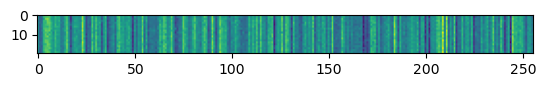

max out_cls tensor(1.9365, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.7480, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [19] [0]
cost_matrix (20, 1)
matched pred tensor([[0.7642, 0.1265, 0.9756, 0.5571, 0.4563, 0.7437]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.8035, 0.4133, 0.6996, 0.8545, 0.4274, 0.6721]], device='cuda:0')
pred cls tensor([[ 1.8096, -2.5020],
        [ 1.5977, -2.5527],
        [ 1.5508, -2.5508],
        [ 1.4883, -2.4473],
        [ 1.7393, -2.3418],
        [ 1.7861, -2.4316],
        [ 1.6514, -2.3945],
        [ 1.7188, -2.7480],
        [ 1.6328, -2.3867],
        [ 1.6973, -2.3516],
        [ 1.7334, -2.5605],
        [ 1.6104, -2.2676],
        [ 1.7549, -2.5098],
        [ 1.6338, -2.7090],
        [ 1.5791, -2.6113],
        [ 1.7334, -2.5078],
        [ 1.4873, -2.5234],
        [ 1.9072, -2.3848],
        [ 1.7568, -2.4141],
        

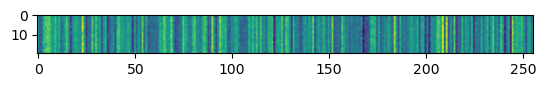

max out_cls tensor(1.9355, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.7461, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 4  5 12 17] [3 2 0 1]
cost_matrix (20, 4)
matched pred tensor([[0.4690, 0.4519, 0.9409, 0.7329, 0.4670, 0.5811],
        [0.5601, 0.3960, 0.7456, 0.5278, 0.5088, 0.5469],
        [0.5674, 0.4810, 0.7432, 0.5137, 0.4360, 0.6172],
        [0.6416, 0.1848, 0.7710, 0.6567, 0.3782, 0.6279]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.7356, 0.4736, 0.5652, 0.7523, 0.4713, 0.5711],
        [0.7100, 0.4697, 0.5691, 0.7239, 0.4718, 0.5641],
        [0.4850, 0.4104, 0.7034, 0.5177, 0.4313, 0.6627],
        [0.6696, 0.4595, 0.5994, 0.6933, 0.4625, 0.5921]], device='cuda:0')
pred cls tensor([[ 1.5635, -2.4395],
        [ 1.9346, -2.4355],
        [ 1.6250, -2.4922],
        [ 1.5693, -2.4121],
        [ 1.7832, -2.3457],
        [ 1.5303, -2.5586],
        [

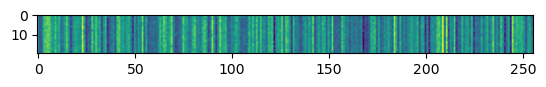

max out_cls tensor(2.0664, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.6172, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 0  6  9 16] [0 1 2 3]
cost_matrix (20, 4)
matched pred tensor([[0.6172, 0.2358, 0.6890, 0.5474, 0.5205, 0.6865],
        [0.6309, 0.4868, 0.6377, 0.8037, 0.3916, 0.2651],
        [0.7070, 0.6431, 0.8037, 0.7300, 0.5566, 0.3921],
        [0.7729, 0.4521, 0.5693, 0.8628, 0.5415, 0.4473]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4850, 0.4104, 0.7034, 0.5177, 0.4313, 0.6627],
        [0.6696, 0.4595, 0.5994, 0.6933, 0.4625, 0.5921],
        [0.7100, 0.4697, 0.5691, 0.7239, 0.4718, 0.5641],
        [0.7356, 0.4736, 0.5652, 0.7523, 0.4713, 0.5711]], device='cuda:0')
pred cls tensor([[ 1.8643, -2.3457],
        [ 1.8789, -2.5488],
        [ 1.7861, -2.4648],
        [ 1.7002, -2.5391],
        [ 1.6641, -2.2969],
        [ 1.7295, -2.3164],
        [

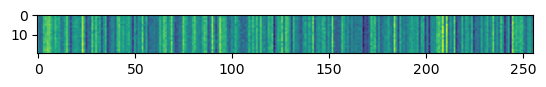

max out_cls tensor(2.0312, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.7441, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 4 13] [1 0]
cost_matrix (20, 2)
matched pred tensor([[0.3835, 0.3599, 0.9517, 0.5859, 0.3186, 0.6436],
        [0.3113, 0.2146, 1.0215, 0.4109, 0.2058, 0.8071]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4386, 0.3586, 0.7839, 0.5645, 0.3595, 0.7828],
        [0.2565, 0.3105, 0.8238, 0.3677, 0.3526, 0.7780]], device='cuda:0')
pred cls tensor([[ 1.6279, -2.6172],
        [ 1.6914, -2.7441],
        [ 1.7217, -2.5918],
        [ 1.6387, -2.6680],
        [ 1.7090, -2.4727],
        [ 1.7725, -2.7227],
        [ 1.7549, -2.4941],
        [ 1.4365, -2.6777],
        [ 1.7080, -2.4258],
        [ 1.7373, -2.4160],
        [ 1.7656, -2.6504],
        [ 1.5605, -2.1953],
        [ 1.6270, -2.7012],
        [ 1.6299, -2.6797],
        [ 1.7227, -2.6836],

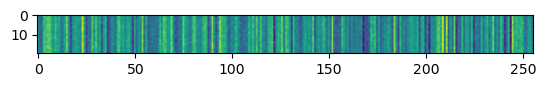

max out_cls tensor(2.0664, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.8848, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 8 11] [0 1]
cost_matrix (20, 2)
matched pred tensor([[0.5083, 0.3328, 0.8516, 0.3369, 0.2368, 0.9883],
        [0.4148, 0.4487, 0.8979, 0.6836, 0.3967, 0.7280]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.2565, 0.3105, 0.8238, 0.3677, 0.3526, 0.7780],
        [0.4386, 0.3586, 0.7839, 0.5645, 0.3595, 0.7828]], device='cuda:0')
pred cls tensor([[ 1.8135, -2.6387],
        [ 1.5146, -2.6543],
        [ 1.6533, -2.5039],
        [ 1.6797, -2.5723],
        [ 1.5244, -2.4180],
        [ 1.7490, -2.4473],
        [ 1.7129, -2.4688],
        [ 1.4688, -2.5996],
        [ 1.7031, -2.5508],
        [ 1.7422, -2.4082],
        [ 1.5898, -2.5957],
        [ 1.5332, -2.2852],
        [ 1.8223, -2.7207],
        [ 1.7412, -2.5098],
        [ 1.6924, -2.5938],

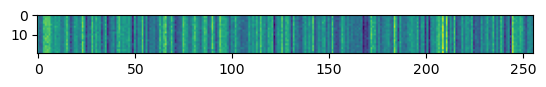

max out_cls tensor(2.1172, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.9121, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [7] [0]
cost_matrix (20, 1)
matched pred tensor([[ 0.6230,  0.1968,  0.8628,  0.8203, -0.0117,  0.8145]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.5981, 0.3687, 0.7605, 0.6640, 0.3216, 0.8161]], device='cuda:0')
pred cls tensor([[ 1.7334, -2.1973],
        [ 1.8271, -2.4492],
        [ 1.7920, -2.4434],
        [ 1.8584, -2.4473],
        [ 1.8682, -2.2617],
        [ 1.9395, -2.4141],
        [ 1.8828, -2.2969],
        [ 1.6807, -2.4219],
        [ 1.9971, -2.4336],
        [ 1.7451, -2.2910],
        [ 1.7988, -2.3398],
        [ 1.7041, -2.2793],
        [ 2.1172, -2.4004],
        [ 1.8311, -2.5371],
        [ 1.9023, -2.4707],
        [ 1.8906, -2.1680],
        [ 1.8027, -2.3242],
        [ 1.9697, -2.3008],
        [ 1.6592, -2.4707],
   

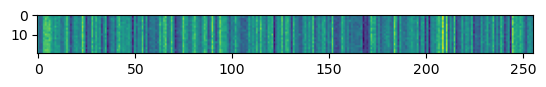

max out_cls tensor(2.0508, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.8320, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [2] [0]
cost_matrix (20, 1)
matched pred tensor([[ 0.5464,  0.3845,  0.8823,  0.6216, -0.0031,  0.9521]],
       device='cuda:0', dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.5981, 0.3687, 0.7605, 0.6640, 0.3216, 0.8161]], device='cuda:0')
pred cls tensor([[ 1.9180, -2.5234],
        [ 1.7578, -2.5059],
        [ 1.7520, -2.4512],
        [ 1.7568, -2.3594],
        [ 1.8623, -2.4336],
        [ 1.7178, -2.5508],
        [ 1.8145, -2.4414],
        [ 1.7070, -2.3457],
        [ 1.6992, -2.5469],
        [ 1.8018, -2.3457],
        [ 1.6670, -2.4590],
        [ 1.6504, -2.3340],
        [ 2.0508, -2.6250],
        [ 1.9521, -2.5215],
        [ 1.8135, -2.5312],
        [ 1.7578, -2.4902],
        [ 1.6885, -2.3926],
        [ 1.9053, -2.3008],
        [ 1.6982, -2.5645],
   

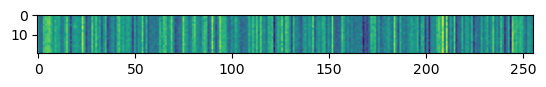

max out_cls tensor(1.8154, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.6953, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [13 15] [0 1]
cost_matrix (20, 2)
matched pred tensor([[0.3818, 0.4568, 0.8413, 0.4460, 0.3979, 0.9048],
        [0.4744, 0.4783, 0.9775, 0.5518, 0.3577, 0.5488]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.0859, 0.4044, 0.7057, 0.1183, 0.3720, 0.7559],
        [0.2336, 0.4653, 0.5861, 0.2565, 0.4648, 0.5874]], device='cuda:0')
pred cls tensor([[ 1.6621, -2.3750],
        [ 1.5586, -2.6953],
        [ 1.7432, -2.5684],
        [ 1.7471, -2.5801],
        [ 1.6680, -2.5352],
        [ 1.7197, -2.4316],
        [ 1.6621, -2.4727],
        [ 1.4609, -2.6055],
        [ 1.5898, -2.5977],
        [ 1.8057, -2.4414],
        [ 1.7773, -2.5410],
        [ 1.6514, -2.2910],
        [ 1.7920, -2.6191],
        [ 1.8154, -2.4512],
        [ 1.6035, -2.6758],

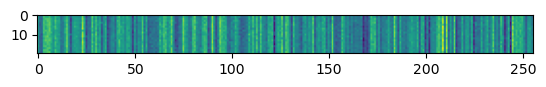

max out_cls tensor(1.9512, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.8809, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 9 13] [1 0]
cost_matrix (20, 2)
matched pred tensor([[0.6104, 0.3188, 0.6880, 0.3564, 0.4280, 0.5737],
        [0.2327, 0.2710, 0.8765, 0.2520, 0.2573, 0.7676]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.2336, 0.4653, 0.5861, 0.2565, 0.4648, 0.5874],
        [0.0859, 0.4044, 0.7057, 0.1183, 0.3720, 0.7559]], device='cuda:0')
pred cls tensor([[ 1.5527, -2.6055],
        [ 1.6973, -2.7266],
        [ 1.5078, -2.7793],
        [ 1.2744, -2.6426],
        [ 1.7158, -2.4902],
        [ 1.7705, -2.4102],
        [ 1.5479, -2.6426],
        [ 1.4229, -2.5684],
        [ 1.7285, -2.6602],
        [ 1.7988, -2.5078],
        [ 1.6689, -2.7090],
        [ 1.4824, -2.3984],
        [ 1.7139, -2.5918],
        [ 1.6191, -2.8809],
        [ 1.5381, -2.6484],

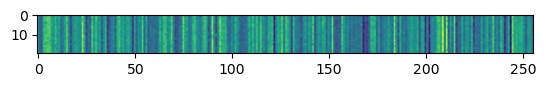

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max out_cls tensor(2.0273, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.7109, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [12 14] [1 0]
cost_matrix (20, 2)
matched pred tensor([[0.6792, 0.3235, 0.7388, 0.7520, 0.4119, 0.8154],
        [0.5757, 0.3220, 0.9219, 0.6523, 0.3735, 0.8428]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4386, 0.3586, 0.7839, 0.5645, 0.3595, 0.7828],
        [0.2565, 0.3105, 0.8238, 0.3677, 0.3526, 0.7780]], device='cuda:0')
pred cls tensor([[ 1.6621, -2.6895],
        [ 1.7402, -2.6270],
        [ 1.6074, -2.7109],
        [ 1.4678, -2.5488],
        [ 1.6582, -2.4551],
        [ 1.5293, -2.4395],
        [ 1.7432, -2.6426],
        [ 1.5371, -2.6230],
        [ 1.7637, -2.3516],
        [ 1.8145, -2.5234],
        [ 1.7178, -2.3164],
        [ 1.6357, -2.2637],
        [ 1.8662, -2.6777],
        [ 1.6836, -2.5195],
        [ 1.6914, -2.6836],

d:\conda\envs\layout\lib\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred[row_idx,0] tensor([0.6792, 0.5757], device='cuda:0', dtype=torch.float16)
row_idx  , col_idx [ 2  9 12 19] [0 2 1 3]
cost_matrix (20, 4)
matched pred 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[0.8823, 0.4810, 0.6929, 0.5327, 0.5796, 0.7515],
        [0.6343, 0.5776, 0.4685, 0.7422, 0.2378, 0.5483],
        [0.8271, 0.5522, 0.5845, 0.7163, 0.3743, 0.6382],
        [0.6636, 0.3840, 0.4512, 0.8501, 0.6416, 0.5210]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4850, 0.4104, 0.7034, 0.5177, 0.4313, 0.6627],
        [0.7100, 0.4697, 0.5691, 0.7239, 0.4718, 0.5641],
        [0.6696, 0.4595, 0.5994, 0.6933, 0.4625, 0.5921],
        [0.7356, 0.4736, 0.5652, 0.7523, 0.4713, 0.5711]], device='cuda:0')
pred cls tensor([[ 1.8906, -2.4961],
        [ 1.7676, -2.3867],
        [ 1.8936, -2.3809],
        [ 1.8809, -2.5156],
        [ 2.0273, -2.5391],
        [ 1.6768, -2.3438],
        [ 1.8135, -2.4629],
        [ 1.6533, -2.5879],
        [ 1.9258, -2.6074],
        [ 1.8975, -2.3613],
        [ 1.5205, -2.2617],
        [ 1.6846, -2.5195],
        [ 1.9102, -2.4062],
        [ 1.6768, -2.4316],
        [ 1.7021, -2.4043],
     

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred[row_idx,0] tensor([0.8823, 0.6343, 0.8271, 0.6636], device='cuda:0', dtype=torch.float16)
  self.query_embed.weight  Parameter containing:
tensor([[-0.4303, -0.9877, -1.0976,  ...,  0.8323, -1.3205, -0.3638],
        [-0.4590, -0.6195,  0.0213,  ..., -1.3967, -0.8102, -0.7743],
        [ 0.6708,  0.9286, -0.9716,  ...,  0.6724, -1.9172,  0.7619],
        ...,
        [ 1.9279,  1.4299,  0.5526,  ..., -0.1058,  1.1228,  0.6192],
        [ 0.2749,  1.3256,  0.3388,  ...,  0.8510,  0.8514,  0.3868],
        [ 0.4783, -1.8509, -0.1715,  ...,  1.7900,  0.1395,  1.2424]],
       device='cuda:0', requires_grad=True)


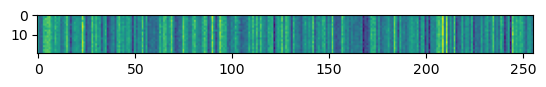

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max out_cls tensor(1.9463, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.6680, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 8 17] [0 1]
cost_matrix (20, 2)
matched pred tensor([[0.2146, 0.2852, 0.7563, 0.6948, 0.3584, 1.0605],
        [0.4297, 0.4048, 0.7974, 0.7148, 0.4143, 0.8613]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.2565, 0.3105, 0.8238, 0.3677, 0.3526, 0.7780],
        [0.4386, 0.3586, 0.7839, 0.5645, 0.3595, 0.7828]], device='cuda:0')
pred cls tensor([[ 1.7031, -2.3281],
        [ 1.5176, -2.5918],
        [ 1.5840, -2.3965],
        [ 1.6191, -2.6543],
        [ 1.6270, -2.3184],
        [ 1.6611, -2.5820],
        [ 1.8740, -2.5703],
        [ 1.5830, -2.5527],
        [ 1.5811, -2.4551],
        [ 1.7871, -2.4043],
        [ 1.5830, -2.6074],
        [ 1.5977, -2.5488],
        [ 1.7842, -2.4668],
        [ 1.6016, -2.6270],
        [ 1.4492, -2.3848],

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred[row_idx,0] tensor([0.2146, 0.4297], device='cuda:0', dtype=torch.float16)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


row_idx  , col_idx [ 0  4 12 19] [1 0 2 3]
cost_matrix (20, 4)
matched pred tensor([[0.7422, 0.4194, 0.5708, 0.7036, 0.4739, 0.8442],
        [0.4451, 0.2732, 0.6318, 0.8354, 0.4441, 0.5342],
        [0.6924, 0.4761, 0.4656, 0.8521, 0.5679, 0.6299],
        [0.7476, 0.4639, 0.4465, 0.8447, 0.3982, 0.7275]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.6696, 0.4595, 0.5994, 0.6933, 0.4625, 0.5921],
        [0.4850, 0.4104, 0.7034, 0.5177, 0.4313, 0.6627],
        [0.7100, 0.4697, 0.5691, 0.7239, 0.4718, 0.5641],
        [0.7356, 0.4736, 0.5652, 0.7523, 0.4713, 0.5711]], device='cuda:0')
pred cls tensor([[ 1.7881, -2.2832],
        [ 1.9463, -2.5762],
        [ 1.7744, -2.4551],
        [ 1.7373, -2.4707],
        [ 1.7295, -2.4199],
        [ 1.6836, -2.6035],
        [ 1.6709, -2.5469],
        [ 1.7988, -2.5957],
        [ 1.7432, -2.3652],
        [ 1.8125, -2.5918],
        [ 1.8232, -2.5117],
        [ 1.4951, -2.4902],
        [ 1.8

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 5:  20%|██        | 1/5 [00:02<00:11,  2.94s/it, loss=0.526, v_num=193]  self.query_embed.weight  Parameter containing:
tensor([[-0.4303, -0.9877, -1.0976,  ...,  0.8323, -1.3206, -0.3638],
        [-0.4590, -0.6195,  0.0213,  ..., -1.3967, -0.8102, -0.7743],
        [ 0.6708,  0.9286, -0.9716,  ...,  0.6724, -1.9173,  0.7619],
        ...,
        [ 1.9279,  1.4299,  0.5526,  ..., -0.1058,  1.1228,  0.6192],
        [ 0.2749,  1.3256,  0.3388,  ...,  0.8510,  0.8514,  0.3868],
        [ 0.4783, -1.8509, -0.1715,  ...,  1.7900,  0.1395,  1.2424]],
       device='cuda:0')


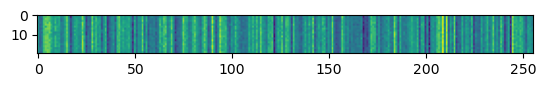

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max out_cls tensor(1.9121, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.7793, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [12 17] [1 0]
cost_matrix (20, 2)
matched pred tensor([[0.7158, 0.2261, 0.9409, 0.7744, 0.3088, 0.8940],
        [0.5171, 0.2886, 0.7998, 0.8901, 0.3704, 1.0186]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.6574, 0.3061, 0.8399, 0.8426, 0.3152, 0.8315],
        [0.4292, 0.3165, 0.8180, 0.5648, 0.3208, 0.8136]], device='cuda:0')
pred cls tensor([[ 1.7002, -2.3516],
        [ 1.7139, -2.6152],
        [ 1.7490, -2.3438],
        [ 1.6826, -2.7793],
        [ 1.7998, -2.4531],
        [ 1.7744, -2.4512],
        [ 1.7188, -2.5977],
        [ 1.5879, -2.5312],
        [ 1.7744, -2.3281],
        [ 1.8174, -2.2480],
        [ 1.8105, -2.5215],
        [ 1.6689, -2.3496],
        [ 1.7695, -2.2852],
        [ 1.7822, -2.4238],
        [ 1.7305, -2.4609],

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred[row_idx,0] tensor([0.7158, 0.5171], device='cuda:0', dtype=torch.float16)
row_idx  , col_idx [ 7 17] [1 0]
cost_matrix (20, 2)
matched pred tensor([[0.6548, 0.4688, 0.7939, 0.6597, 0.3623, 0.8276],
        [0.3901, 0.2625, 0.6743, 0.6279, 0.3567, 0.7812]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4427, 0.3599, 0.7823, 0.5653, 0.3640, 0.7770],
        [0.2596, 0.3035, 0.8304, 0.3717, 0.3515, 0.7793]], device='cuda:0')
pred cls tensor([[ 1.7949, -2.4551],
        [ 1.6807, -2.6660],
        [ 1.8447, -2.6621],
        [ 1.7822, -2.4590],
        [ 1.5791, -2.5449],
        [ 1.8105, -2.5137],
        [ 1.5430, -2.4395],
        [ 1.5537, -2.4844],
        [ 1.7705, -2.5664],
        [ 1.9121, -2.5039],
        [ 1.7256, -2.4707],
        [ 1.5898, -2.4004],
        [ 1.8057, -2.6875],
        [ 1.5967, -2.6562],
        [ 1.7705, -2.6992],
        [ 1.6328, -2.5137],
        [ 1.8018, -2.6191],
        [ 1.7432, -2.6367],
        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.]], device='cuda:0', dtype=torch.float16)
L1 loss tensor(0.0892, device='cuda:0', grad_fn=<MeanBackward0>)
cls_loss tensor(0.4180, device='cuda:0', grad_fn=<DivBackward1>)
pred[row_idx,0] tensor([0.6548, 0.3901], device='cuda:0', dtype=torch.float16)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  self.query_embed.weight  Parameter containing:
tensor([[-0.4303, -0.9877, -1.0976,  ...,  0.8323, -1.3206, -0.3638],
        [-0.4590, -0.6195,  0.0213,  ..., -1.3967, -0.8102, -0.7743],
        [ 0.6708,  0.9286, -0.9716,  ...,  0.6724, -1.9173,  0.7619],
        ...,
        [ 1.9279,  1.4299,  0.5526,  ..., -0.1058,  1.1228,  0.6192],
        [ 0.2749,  1.3256,  0.3388,  ...,  0.8510,  0.8514,  0.3868],
        [ 0.4783, -1.8509, -0.1715,  ...,  1.7900,  0.1395,  1.2424]],
       device='cuda:0', requires_grad=True)


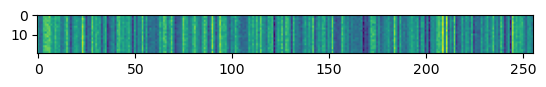

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


max out_cls tensor(2.0117, device='cuda:0', dtype=torch.float16, grad_fn=<MaxBackward1>) min  tensor(-2.7285, device='cuda:0', dtype=torch.float16, grad_fn=<MinBackward1>)
row_idx  , col_idx [ 4 17] [0 1]
cost_matrix (20, 2)
matched pred tensor([[0.4626, 0.4265, 0.7856, 0.8862, 0.2764, 0.9229],
        [0.5845, 0.0765, 0.6792, 0.8618, 0.3752, 0.9102]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4292, 0.3165, 0.8180, 0.5648, 0.3208, 0.8136],
        [0.6574, 0.3061, 0.8399, 0.8426, 0.3152, 0.8315]], device='cuda:0')
pred cls tensor([[ 1.7852, -2.4492],
        [ 1.8623, -2.5547],
        [ 1.5215, -2.5566],
        [ 1.6943, -2.3965],
        [ 1.7217, -2.3867],
        [ 1.7432, -2.5215],
        [ 1.5254, -2.5508],
        [ 1.5791, -2.4102],
        [ 1.8262, -2.4355],
        [ 1.5977, -2.4551],
        [ 1.6699, -2.5664],
        [ 1.5576, -2.3789],
        [ 1.6143, -2.4766],
        [ 1.5322, -2.4941],
        [ 1.7070, -2.4941],

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


pred[row_idx,0] tensor([0.4626, 0.5845], device='cuda:0', dtype=torch.float16)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


row_idx  , col_idx [4 7] [1 0]
cost_matrix (20, 2)
matched pred tensor([[0.4685, 0.2673, 0.7969, 0.6812, 0.3865, 1.0039],
        [0.5918, 0.4148, 0.7715, 0.4194, 0.5762, 0.8164]], device='cuda:0',
       dtype=torch.float16, grad_fn=<IndexBackward0>)
matched gt  tensor([[0.4427, 0.3599, 0.7823, 0.5653, 0.3640, 0.7770],
        [0.2596, 0.3035, 0.8304, 0.3717, 0.3515, 0.7793]], device='cuda:0')
pred cls tensor([[ 1.8623, -2.5684],
        [ 1.7734, -2.6426],
        [ 1.6094, -2.4902],
        [ 1.5615, -2.7070],
        [ 1.6875, -2.5371],
        [ 1.8721, -2.4355],
        [ 1.4365, -2.7070],
        [ 1.5908, -2.5215],
        [ 1.5771, -2.4492],
        [ 2.0117, -2.5371],
        [ 1.8311, -2.5840],
        [ 1.5117, -2.4199],
        [ 1.6533, -2.6523],
        [ 1.6680, -2.6152],
        [ 1.4492, -2.6562],
        [ 1.6807, -2.4160],
        [ 1.4658, -2.7285],
        [ 1.7920, -2.6230],
        [ 1.6836, -2.5820],
        [ 1.8965, -2.6719]], device='cuda:0', dtype=torch.flo

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([0.4685, 0.5918], device='cuda:0', dtype=torch.float16)


d:\conda\envs\layout\lib\site-packages\pytorch_lightning\trainer\call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [30]:
import torch
from torch import nn
from torch.nn import functional as F
from typing import Any
import pytorch_lightning as pl
from config import *
import torchvision.models as models
from torchvision.ops import MLP
import math
from torch import Tensor
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
from VerticalCompressionNet import * 
from CustomTransformer import *

class PositionalEncoding(nn.Module):
    def __init__(self, d_model: 256, dropout: float = 0.0, max_len: int = 1024):
        super().__init__()        
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)        
        print("position", position.shape)
        div_term = torch.exp(torch.arange(0, d_model) * (-math.log(10000.0) / d_model))
        #div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        print("div_term", div_term.shape)
        #pe = torch.zeros(max_len, 1, d_model)  # []
        pe = torch.zeros(max_len, d_model)  # [ 1024 , 256 ]
        print("pe", pe.shape)
        #pe[:, 0, 0::2] = torch.sin(position * div_term)
        #pe[:, 0, 1::2] = torch.cos(position * div_term)
        pe[: ,:] = torch.sin(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: Tensor) -> Tensor:    
        """
        Arguments:
            #x: Tensor, shape ``[seq_len, batch_size, embedding_dim]``
            x: Tensor, shape ``[batch_size , seq_len , embedding_dim]``
        """
        #x = x + self.pe[:x.size(0)]
        # [batch size , 1024 , 256 ]
        x = x + self.pe
        return self.dropout(x) , self.pe
        #return self.dropout(x)
        #return self.pe[:0]

class CustomDecoder(nn.Module):
    def __init__(self,  d_model = 256 ,dropout = 0.1 , out_length = 20 , cls_num = 1  , batch_size = 2):
        super().__init__()        
        self.dropout = nn.Dropout(dropout)
        #self.conv1 = nn.Conv1d(d_model, d_model//2 , kernel_size=3 , padding=1)
        self.conv1 = nn.Linear(d_model, d_model//2)
        #self.conv2 = nn.Conv1d(d_model//2, d_model//4 , kernel_size=3 , padding=1)

        self.cls_head = nn.Linear(d_model//2, 1 )
        self.box_head = nn.Linear(d_model//2, 5 )
        #self.maxpool = nn.MaxPool2d((1024,out_length))

        #self.norm1 = nn.LayerNorm( ( batch_size  , 1024,d_model//2))
        #self.norm2 = nn.LayerNorm(d_model//4)
        #self.dropout1 = nn.Dropout(dropout)
        #self.dropout2 = nn.Dropout(dropout)
    def forward(self , memory ):
        '''
        memory : encoder output , shape [1024 , b , hidden_dim ]
        '''
        # permute to (batch , channels , sequence length)
        #memory = memory.permute(1 , 2 , 0)

        x = self.conv1(memory)
        x = torch.relu(x)
        x = self.dropout(x)
        '''
        x = self.norm1(x)

        x = self.conv2(x)
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.norm2(x)
        '''
        #x = x.permute(0,2,1) # [batch , 1024 , hidden]
        #x = self.norm1(x)

        x = x.permute(1,0,2) # [batch , 1024 , hidden]
        #print("before max pool" , x.shape)
        #x = self.maxpool(x)
        #print("max pool" , x.shape)

        box_logits , cls_logits = self.box_head(x) , self.cls_head(x)         
        print("cls_logits",cls_logits)
        return box_logits , cls_logits


class TransformerModel(nn.Module):
    def __init__(self, d_model: int, nhead: int , d_hid: int, nlayers: int, dropout: float = 0.1 , activation="relu" , normalize_before=False):
        super().__init__()
        #self.ntoken = ntoken
        self.model_type = 'Transformer'
        self.d_model = d_model
        
        encoder_layer = TransformerEncoderLayer(d_model, nhead, d_hid,
                                                dropout, activation, normalize_before)
        encoder_norm = nn.LayerNorm(d_model) if normalize_before else None
        self.encoder = TransformerEncoder(encoder_layer, nlayers, encoder_norm)
        #self.decoder = CustomDecoder(d_model=d_model , dropout= dropout )

        '''
        decoder_layer = TransformerDecoderLayer(d_model, nhead, d_hid, dropout, activation, normalize_before)
        decoder_norm = nn.LayerNorm(d_model)
        self.decoder = TransformerDecoder(decoder_layer, nlayers, decoder_norm,
                                          return_intermediate=False)
        '''
        decoder_layer = nn.TransformerDecoderLayer(d_model=256, nhead=8  )
        self.decoder = nn.TransformerDecoder(decoder_layer, num_layers=6)

        self.cls_head = nn.Linear(d_model, 2 )
        self.box_head = nn.Linear(d_model, 6 )
        
        self.query_embed = nn.Embedding(20, d_model)
    
        
    def forward(self, src: Tensor, query , pos ) -> Tensor:
        # permute to (Sequence_length , Batches , Hidden layer)
        
        #plt.imshow(src[0].detach().cpu().numpy())
        #plt.title("src")
        #plt.show()
        src         = src.permute(1 , 0 , 2)# torch.Size([1024, b, 256])        
        batch_size  = src.shape[1]
        #print("batch_size" , batch_size)
        b_pe        = pos.unsqueeze(1).repeat(1,batch_size , 1)  # torch.Size([1024, b, 256])
        #b_query        = query.unsqueeze(1).repeat(1,batch_size , 1)  # torch.Size([1024, b, 256])
        
        
        memory = self.encoder(src , pos= b_pe)  # torch.Size([1024, b, 256])
        #tgt = torch.zeros(( 20 , batch_size , 256), device=memory.device)
        tgt = torch.zeros((  batch_size,20 , 256), device=memory.device)
        tgt += self.query_embed.weight.repeat(batch_size , 1,1)
        print("  self.query_embed.weight " ,   self.query_embed.weight)
      
        tgt=tgt.permute(1,0,2)
        #box_logits , cls_logits = self.decoder(memory)
        
        out = self.decoder(tgt , memory ) #[ seq_len , batch , hidden]
        
        out = out.permute(1,0,2) #[  batch, seq_len , hidden]

        plt.imshow(out[0].detach().cpu().numpy())
        plt.show()

        box_logits = self.box_head(out)
        cls_logits = self.cls_head(out)
        

        return box_logits ,cls_logits



    

class VerticalQueryTransformer(pl.LightningModule):    
    def __init__(self  ,  max_predict_count = 24 , hidden_out = 128 , class_num = 1 , log_folder = "__test" , num_classes = 1 , backbone_trainable =False, load_weight ="" , top_k = 20):
        #print(" input_size" ,  input_size)
        super().__init__()
        self.backbone = Resnet()
        self.out_scale = 8
        self.step_cols = 4        
        self.hidden_size = hidden_out
        self.max_predict_count = max_predict_count
        self.num_classes  = num_classes 
        self.top_k_num = top_k        

        self.fixed_pe = PositionalEncoding(hidden_out, 0.1 , 1024)

        self.transformer = TransformerModel( d_model=hidden_out , nhead=8 , d_hid= 2048,nlayers=6 )
        #self.transformer = nn.TransformerEncoderLayer(hidden_out ,  8 , 2048 , dropout= 0.1) 

        #self.box_head= nn.Linear( hidden_out , 6 )        
        #self.vqt_box_head= nn.Linear( hidden_out , 5 )        
        #self.vqt_cls_head= nn.Linear( hidden_out , class_num )        
        self.confidence_threshold = 0.85

        # loss
        self.box_cost = 1
        self.cls_cost = 5

        self.log_folder = create_folder(os.path.join(os.getcwd() , "output" , log_folder))
        #self.box_head.bias.data = torch.nn.Parameter(torch.tensor([0.3,0.2,0.2,0.3]))
        #self.box_head.weight.data.fill_(0)
        
        # Inference channels number from each block of the encoder
        with torch.no_grad():
            dummy = torch.zeros(1, 3, 320, 190)
            c1, c2, c3, c4 = [b.shape[1] for b in self.backbone(dummy)] # resnet feature channel數
            #print("c1, c2, c3, c4" , c1, c2, c3, c4)
            c_last = (c1*8 + c2*4 + c3*2 + c4*1) // self.out_scale            
        #self.v_reproj = nn.Conv2d(1024 , self.max_predict_count,kernel_size=1)
            
        self.reduce_height_module = GlobalHeightStage(c1, c2, c3, c4 , out_scale=self.out_scale , pretrain_weight= load_weight , freeze_model= not backbone_trainable)

    def post_process(self ,box_coord , index , max_length = 1024):
        '''
        box_coord : contains left top v ,left btm v , du , right top v , right btm v
        '''
        origin_shape = box_coord.shape
        box_coord = box_coord.view(-1 , 5)
        
        us = (index/max_length).view((box_coord.shape[0] , 1))
        uvv_uvv_b = torch.zeros((box_coord.shape[0] , 6) , device=box_coord.device)
        uvv_uvv_b[:,0] = us[:,0]
        uvv_uvv_b[:,1] = box_coord[:,0] # left top v
        uvv_uvv_b[:,2] = box_coord[:,1] # left btm v
        uvv_uvv_b[:,3] = us[:,0] + box_coord[:,2] # right u
        uvv_uvv_b[:,4] = box_coord[:,3] # right top v
        uvv_uvv_b[:,5] = box_coord[:,4] # right btm v

        #return uvv_uvv_b.view(origin_shape[0] , origin_shape[1] , 6)
        return uvv_uvv_b.view(origin_shape[0] , -1 , 6)

        pass

    def forward(self ,x ):
        features = self.backbone(x) # [4 , c , h, w]      
        # vertical feature
        reduced_feats  = self.reduce_height_module(features , x.shape[3]//self.step_cols ) # [b , 1024 ,  256] width = 1024 , 256d latent code each.

        # Add fixed PE
        embedded_feat , pe_pattern = self.fixed_pe(reduced_feats)
        #debug = torch.zeros_like(pe_pattern)

        #out_box , out_cls = self.transformer(reduced_feats , pe_pattern ,pe_pattern)  # (b , 1024 , 256 )       
        out_box , out_cls = self.transformer(embedded_feat , pe_pattern ,pe_pattern)  # (b , 1024 , 256 )       

        return out_box , out_cls
    def inf(self , imgs ):
        out_box , out_cls   = self.forward(imgs)  # [ batch , top_k , 5]   , [ batch , top_k , 1]         
        batch_size = out_box.shape[0]
        #sampled_u_idx = torch.argwhere( torch.sigmoid(out_cls.view(batch_size , -1)) > 0.01 )
        #print("sampled_u_idx" , sampled_u_idx)

        sampled_box_b = []
        #each batch
        for img , pbox , pcls in zip(imgs, out_box , out_cls.view(batch_size,-1)):  
            u_id = torch.argwhere(torch.sigmoid(pcls) > self.confidence_threshold)
            #u_id = torch.argwhere(torch.sigmoid(pcls) > 0.34)
            #print("max sigmoid" , torch.max(torch.sigmoid(pcls)))
            print("u_id" , u_id.shape)
            #print("pbox" , pbox.shape)
            if(u_id.numel() ==0):
                continue
            u_id = u_id.view(-1)            
            
            pred = self.post_process(pbox[u_id,:] , u_id ).view(-1,6)
            
            save_folder = create_folder( os.path.join(self.log_folder ,"val"))
            save_path = os.path.join(save_folder, f"val_ep_{self.current_epoch}-{self.global_step}" )
            pred_us , pred_tops , pred_btms = self.pack_visualize(pred[:,0], pred[:,1],pred[:,2],pred[:,3] -pred[:,0] ,pred[:,4],pred[:,5] )                    
            vis_imgs = visualize_2d_single(pred_us , pred_tops , pred_btms , u_grad = F.sigmoid(pcls).view(1 , -1 ) , imgs=  img , title="Pred" , save_path= save_path  )
            #plt.imshow(vis_imgs)
            #plt.show()

            # ToDo: calculate loss
            
            
        
        pass
    #@torch.no_grad()
    def find_match(self, gt , pred):
        #print("gt"  , gt)
        gt_vec = torch.stack(gt).permute(1,0)
        pred_vec = torch.stack(pred).permute(1,0)
        loss_dist = torch.cdist(gt_vec , pred_vec)
        
        each_gt_pred_best_idx = torch.argmax(loss_dist, 0 )      
        #print("each_gt_pred_best_idx" , each_gt_pred_best_idx)          

        return gt_vec[each_gt_pred_best_idx] , pred_vec
        
    def pack_visualize(self, gt_u_b , gt_vtop_b , gt_vbtm_b , gt_du_b , gt_dvtop_b , dv_btm_b ):
        
        if isinstance(gt_u_b, torch.Tensor):
            sizes = [t.numel() for t in gt_u_b]               
            us = gt_u_b.flatten().unsqueeze(0).repeat(2, 1).permute(1,0).reshape(-1)
            us[1::2]+=gt_du_b.flatten()
            us = torch.split(us.view(-1,2) , sizes)

            tops = gt_vtop_b.flatten().unsqueeze(0).repeat(2, 1).permute(1,0).reshape(-1)
            tops[1::2]=gt_dvtop_b.flatten()
            tops = torch.split(tops.view(-1,2) , sizes)

            btms = gt_vbtm_b.flatten().unsqueeze(0).repeat(2, 1).permute(1,0).reshape(-1)
            btms[1::2]=dv_btm_b.flatten()
            btms = torch.split(btms.view(-1,2) , sizes)

        elif isinstance(gt_u_b, tuple) and all(isinstance(t, torch.Tensor) for t in gt_u_b):        
            sizes = [len(t) for t in gt_u_b]               
            us = torch.cat(gt_u_b).view(-1).unsqueeze(0).repeat(2, 1).permute(1,0).reshape(-1)
            us[1::2]+=torch.cat(gt_du_b).view(-1)
            us = torch.split(us.view(-1,2) , sizes)

            tops = torch.cat(gt_vtop_b).view(-1).unsqueeze(0).repeat(2, 1).permute(1,0).reshape(-1)
            tops[1::2]=torch.cat(gt_dvtop_b).view(-1)
            tops = torch.split(tops.view(-1,2) , sizes)

            btms = torch.cat(gt_vbtm_b).view(-1).unsqueeze(0).repeat(2, 1).permute(1,0).reshape(-1)
            btms[1::2]=torch.cat(dv_btm_b).view(-1)
            btms = torch.split(btms.view(-1,2) , sizes)
        else:
            assert("Wrong Type.")
        
        return us , tops ,btms
        
        pass

    def training_step(self , input_b ,batch_idx , optimizer_idx):
        
        img = input_b['image']
        
        out_box , out_cls   = self.forward(img)  # [ batch , top_k , 5]   , [ batch , top_k , 1] 
        print("max out_cls" , torch.max(out_cls) , "min " , torch.min(out_cls))
        batch_size = out_box.shape[0]
        
        '''
        if self.current_epoch % 5 == 0 and self.current_epoch > 0 :       
            plt.imshow(out_cls[0].repeat(1,100).detach().cpu().numpy())
            plt.title("encoder cls output")
            plt.show()      
        '''

        # Select top k        
        #top_k = torch.topk(out_cls ,self.top_k_num , dim= 1 )
        #top_k_idx = top_k[1].view(batch_size  , self.top_k_num)  # [b , top_k ]        
        #print("top_k_idx" , top_k_idx.shape , top_k_idx)

        #topk_box = out_box.gather(1 , top_k_idx.unsqueeze(-1).repeat(1,1,5))
        #topk_cls = out_cls.gather(1 , top_k_idx.unsqueeze(-1).repeat(1,1,1))
        #print("topk_cls" , topk_cls.shape)
        
        #pred_uvvboxes_b = self.post_process(topk_box , top_k_idx )
        #pred_uvvboxes_b = self.post_process(out_box , out_box )
        #print("pred_uvvboxes_b" , pred_uvvboxes_b.shape ,pred_uvvboxes_b)

        # remove padding , each batch have different length
        gt_u_b = unpad_data( input_b['u'])          
        gt_vtop_b =unpad_data(input_b['v_top'])
        gt_vbtm_b = unpad_data (input_b['v_btm'])
        gt_du_b = unpad_data(input_b['du'])
        gt_dvtop_b = unpad_data(input_b['dv_top'])
        gt_dv_btm_b = unpad_data(input_b['dv_btm'])

        #selected_gt_u_grad =  input_b['u_grad'].view(batch_size , 1024 , 1).gather(1 , top_k_idx.unsqueeze(-1).repeat(1,1,1)).view(batch_size , self.top_k_num)        

        total_loss = 0
        b_cnt = 0
        
        #for u,vtop,vbtm,du,dvtop, dvbtm , pred ,cls_b,gt_cls in zip(gt_u_b , gt_vtop_b , gt_vbtm_b , gt_du_b , gt_dvtop_b , gt_dv_btm_b , pred_uvvboxes_b , topk_cls , input_b['u_grad']):
        for u,vtop,vbtm,du,dvtop, dvbtm , pred ,cls_b  in zip(gt_u_b , gt_vtop_b , gt_vbtm_b , gt_du_b , gt_dvtop_b , gt_dv_btm_b , out_box , out_cls  ):
            
            # match            
            #gt_box =  torch.vstack([vtop,vbtm,du ,dvtop , dvbtm]).permute(1,0)            
            gt_box =  torch.vstack([ u, vtop,vbtm, u + du ,dvtop , dvbtm]).permute(1,0)

            box_loss = torch.cdist( pred , gt_box , p=1)
            
            #cls_loss = - F.softmax( cls_b , -1)            

            gt_labels = torch.zeros(self.max_predict_count , device=cls_b.device)
            gt_labels[ torch.round(u*self.max_predict_count).to(torch.long)] = 1
            gt_labels = gt_labels.to(torch.long).view(-1,1)
            cls_loss = -torch.gather(cls_b,1,gt_labels)          
            

            #cost_matrix = box_loss * self.box_cost + cls_loss             
            ###
            ### TODO: 檢查cls 跟GT是不是對的
            ### TODO: 增加cls 訓練機會
            ### TODO: 製作inf (testing)測試
            ###
            cost_matrix = box_loss * self.box_cost  + cls_loss *0.25                        
            cost_matrix = cost_matrix.detach().cpu().numpy()            
            row_idx  , col_idx = linear_sum_assignment(cost_matrix)       
            print("row_idx  , col_idx" , row_idx  , col_idx)               
            print("cost_matrix" , cost_matrix.shape)               
            '''
            row_idx = torch.round(u*self.max_predict_count).to(torch.long)
            col_idx = torch.arange(u.numel())
            '''

            #print("row_idx  " , row_idx  )
            #print("col_idx  " , col_idx  )
            print("matched pred" , pred[row_idx] )
            print("matched gt " , gt_box[col_idx] )
            print("pred cls" , cls_b)            
            gt_cls = torch.zeros_like(cls_b,device= cls_b.device)
            #gt_cls.view(-1)[torch.round(u*self.max_predict_count).to(torch.long)] = 1
            gt_cls[: ,0] = 1
            gt_cls[row_idx ,0] = 0
            gt_cls[row_idx ,1] = 1
            print("gt cls" , gt_cls.shape , gt_cls)

            #neg_sample = (np.random.rand(row_idx.shape[0]) * self.max_predict_count).astype(np.int32)
            #neg_sample = [(val + 1) % self.max_predict_count if val in row_idx else val for val in neg_sample]
            #cls_sample_idx =  np.concatenate((row_idx , neg_sample))

            l1_loss = F.l1_loss(pred[row_idx] ,  gt_box[col_idx]) 
            #cls_loss = F.binary_cross_entropy_with_logits(cls_b.view(-1)[cls_sample_idx], gt_cls.view(-1)[cls_sample_idx]) 
            cls_loss = F.cross_entropy(cls_b.softmax(dim=1), gt_cls) 
            print("L1 loss"  , l1_loss)
            print("cls_loss"  , cls_loss)
            
            total_loss += l1_loss+ cls_loss
            #total_loss += cls_loss
            
            with torch.no_grad():
                #if self.current_epoch % 5 == 0  :                
                if self.current_epoch % 5 == 0 and self.current_epoch > 0 :                
                    save_path =  os.path.join(self.log_folder , f"gt_ep_{self.current_epoch}-{self.global_step}-{b_cnt}" )
                    gt_us , gt_tops , gt_btms = self.pack_visualize(u.view(1 , -1 ) , vtop , vbtm , du , dvtop , dvbtm )
                    #print("gt_us , gt_tops , gt_btms" , gt_us , gt_tops , gt_btms)
                    vis_imgs = visualize_2d_single(gt_us , gt_tops , gt_btms , u_grad =  gt_cls.view(1 , -1 ), imgs= img[b_cnt] , title="GT",save_path=save_path )                
                    
                    save_path =  os.path.join(self.log_folder , f"pred_ep_{self.current_epoch}-{self.global_step}-{b_cnt}" )
                    
                    print("pred[row_idx,0]" , pred[row_idx,0])
                    pred_us , pred_tops , pred_btms = self.pack_visualize(pred[row_idx,0], pred[row_idx,1],pred[row_idx,2],pred[row_idx,3] -pred[row_idx,0] ,pred[row_idx,4],pred[row_idx,5] )
                    
                    vis_imgs = visualize_2d_single(pred_us , pred_tops , pred_btms , u_grad = F.sigmoid(cls_b).view(1 , -1 ) , imgs=  img[b_cnt] , title="Pred" , save_path= save_path  )
                    
           
            b_cnt+=1
            pass        
        return total_loss / batch_size
        pass    

    def ___validation_step(self, input_b, batch_idx):
        print("val!!!!!")
        img = input_b['image']
        
        #out_box , out_cls   = self.forward(img)  # [ batch , top_k , 5]   , [ batch , top_k , 1]         
        self.inf(img)
        return
        

    def configure_optimizers(self):
        backbone_opt = optim.Adam(self.backbone.parameters() , lr=0.00035)
        transforms_opt = optim.Adam(self.transformer.parameters() , lr=0.000015)

        return [backbone_opt , transforms_opt] , []


    pass

# Unit testing...

# Test
dm = CustomDataModule ( train_dir= f"../anno/test_visiable_10_no_cross.json" ,
                        test_dir= f"../anno/test_visiable_10_no_cross.json" , padding_count=100 , use_aug=False , c= 0.95
                       )
m = VerticalQueryTransformer(max_predict_count = 20 , hidden_out=256 , load_weight="D:/OneDrive/OneDrive - NTHU/Layout/Horizon/0912_all_bk.pth"  , backbone_trainable=True, top_k=100)
#img = torch.randn((3,3,1024,512))
#o = m(img)

#print(o)
trainer = pl.Trainer(accelerator='gpu' , devices=1 ,min_epochs=1, max_epochs=10 , precision=16 , fast_dev_run=False )
trainer.fit(m , dm)



In [11]:
a= torch.rand(2,20,2)
b = torch.rand(20,2)
c = b.repeat(2,1,1)
print(c.shape)

torch.Size([2, 20, 2])


In [4]:
a= torch.rand(20,2)
b = torch.rand(20)*2
b = b.to(torch.long).view(-1,1)
#c = a[b]
c= torch.gather(a,1,b)
print(c.shape)
print(a)
print(b)
print()
print(c)

torch.Size([20, 1])
tensor([[0.5586, 0.9481],
        [0.8429, 0.4428],
        [0.9637, 0.4953],
        [0.3987, 0.5778],
        [0.7483, 0.8192],
        [0.3371, 0.1175],
        [0.1622, 0.8997],
        [0.5250, 0.6316],
        [0.9064, 0.6066],
        [0.3197, 0.9865],
        [0.3147, 0.9496],
        [0.5686, 0.6778],
        [0.7604, 0.5776],
        [0.8903, 0.9084],
        [0.3876, 0.0330],
        [0.6404, 0.7046],
        [0.4079, 0.2358],
        [0.5607, 0.9685],
        [0.5166, 0.7910],
        [0.0016, 0.2563]])
tensor([[1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0]])

tensor([[0.9481],
        [0.4428],
        [0.9637],
        [0.5778],
        [0.8192],
        [0.1175],
        [0.8997],
        [0.6316],
        [0.6066],
        [0.3197],
        [0.9496],

In [ ]:
decoder_layer = nn.TransformerDecoderLayer(d_model=512, nhead=8)
transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=6)
memory = torch.rand(10, 32, 512)
tgt = torch.rand(20, 32, 512)
out = transformer_decoder(tgt, memory)
print(out.shape)

In [ ]:
import torch
horizon_path =r"D:/OneDrive/OneDrive - NTHU/Layout/Horizon/0912_all_bk.pth"
#models_dict = torch.load_s
checkpoint = torch.load(horizon_path ,  map_location="cpu")
print(checkpoint['state_dict'].keys())
#model.load_state_dict(checkpoint['model_state_dict'])
pretrained_dict = {k: v for k, v in checkpoint['state_dict'].items() if k in m.state_dict()}
m.load_state_dict(pretrained_dict , strict=False)

In [ ]:
a= torch.rand(2,256 ,1024)
b = nn.Conv1d(256 , 64 , kernel_size=3 ,padding=1)
c = b(a)
print(c.shape)


In [ ]:
a = torch.rand(2,5,2)
print(a)
b=  nn.MaxPool2d((5,1))
c = b(a)
print(c.shape)
print(c)

In [ ]:
a = torch.rand(200).view(2,100,1)
#aa = a[:,:,0].unsqueeze(0)
#print(aa.shape)
b = F.interpolate(a.view(2,-1).unsqueeze(0), 10 )[0]
print(b.shape)

In [ ]:
a = torch.rand(2,10,1)
b = torch.cat([a,a] , dim=1)
print(b.shape)

In [ ]:
#a = torch.rand(2,100,1)
a = torch.arange(400).view(2,100,2)
b = torch.arange(20).view(2,10)

print(a)
print(b)
b= b.unsqueeze(-1).repeat(1,1,2)
print(b)
#print("b unsqueeze",b.unsqueeze(-1))

c = a.gather(1, b)
print(c.shape)
print(c)


In [ ]:
a=torch.arange(5)
b=torch.arange(5)
c=torch.arange(5)

d = torch.vstack([a,b,c]).permute(1,0)
print(d)


In [ ]:
from scipy.optimize import linear_sum_assignment
a = torch.tensor([ [0,1,2]  ,  [0,3,5] , [1,0,5] ]).to(torch.float32)
b = torch.tensor([ [0,1,2] , [1,0,5] ]).to(torch.float32)

cost = torch.cdist(b,a)
print(cost)
row , col = linear_sum_assignment(cost,)
print(row)
print(col)

In [ ]:
x = torch.tensor([[0.7605, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7730, 0.5752, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7057, 0.5861, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8386, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8304, 0.7823, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7034, 0.5994, 0.5691, 0.5652, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.6996, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8305, 0.7819, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8238, 0.7839, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
# Get the indices of non-zero elements
non_zero_indices = torch.nonzero(x)
print(non_zero_indices)
# Get the non-zero values
non_zero_values = x[non_zero_indices[:,0], non_zero_indices[:,1]]

unique = torch.unique(non_zero_indices[:,0] ,return_counts=True)
print("unique" , unique)
# Print the result
print(non_zero_values)
non_zero_values = torch.split(non_zero_values , tuple(unique[1]))
print("split non_zero_values" , non_zero_values)

def unpad_data( x :[Tensor] ) :
	non_zero_indices = torch.nonzero(x)
	print(non_zero_indices)
	# Get the non-zero values
	non_zero_values = x[non_zero_indices[:,0], non_zero_indices[:,1]]

	unique = torch.unique(non_zero_indices[:,0] ,return_counts=True)
	print("unique" , unique)
	# Print the result
	print(non_zero_values)
	non_zero_values = torch.split(non_zero_values , tuple(unique[1]))
	print("split non_zero_values" , non_zero_values)
	return non_zero_values

In [ ]:
a = torch.tensor([[0.58 , 0.6] , [0.4] ] , )
b = torch.tensor([0.1 , 0.2] , )

c = a.repeat(2)
print(a.repeat(2))

In [ ]:
transformer_model = nn.Transformer(nhead=16, num_encoder_layers=12)
src = torch.rand((10, 32, 512))
tgt = torch.rand((20, 32, 512))
out = transformer_model(src, tgt)

print(out.shape)

In [ ]:
import torch

print(torch.rand(1)[0])